#  <center> Assignment 2 </center>

**The goal of this assignment** is to demonstrate that you are able 
 - to prepare a real-life dataset to analysis, 
 - perform machine learning experiments and 
 - thoroughly research the results.

### Main task:  Predict students grades (math and Portugal) using a set of demographic features. 

## <center>  Plan </center>

 1. Read the description of the problem and identify your input and output variables. Load the data using pandas and split the data frame into X (inputs) and y (outputs). 2 points.


 2. Prepare your dataset: encode categorical variables (if any), handle missing variables (if any), generate new features (if you have some intuition that these features can be useful). Preprocess target variable if needed (e.g., combine various classification problems into a single one or convert the target variable to a binary one.) For each transformation give a clear explanation of your motivation. 7 points.


 3. Perform an exploratory analysis of the data via visualization with Seaborn. Try to find meaningful patterns in the data which can be used to make machine learning task more specific or to help with selection and tuning ML models. Perform additional preprocessing of your data if your findings suggest this (again, all steps should be motivated). If there are several options of target variables, you can select some of them after this step with a couple of sentences explaining your choice. 7 points.


 4. Build a proper cross-validation procedure; select an appropriate measure of quality. Choose an ML model reasonably; look for a good set of hyperparameters. Use the prepared cross-validation procedure to estimate the quality of prediction. 9 points.


 5. Analyze the obtained results (interesting findings, remarks on ML experiments, the applicability of the model in a real-life scenario) and make an overall conclusion. 5 points.

 ***Attributes for both (Math course) and  (Portuguese language course) datasets***
 1. school - student's school (binary: "GP" - Gabriel Pereira or "MS" - Mousinho da Silveira)
 2. sex - student's sex (binary: "F" - female or "M" - male)
 3. age - student's age (numeric: from 15 to 22)
 4. address - student's home address type (binary: "U" - urban or "R" - rural)
 5. famsize - family size (binary: "LE3" - less or equal to 3 or "GT3" - greater than 3)
 6. Pstatus - parent's cohabitation status (binary: "T" - living together or "A" - apart)
 7. Medu - mother's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
 8. Fedu - father's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
 9. Mjob - mother's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
 
 10. Fjob - father's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
 11. reason - reason to choose this school (nominal: close to "home", school "reputation", "course" preference or "other")
 12. guardian - student's guardian (nominal: "mother", "father" or "other")
 13. traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
 14. studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
 15. failures - number of past class failures (numeric: n if 1<=n<3, else 4)
 16. schoolsup - extra educational support (binary: yes or no)
 17. famsup - family educational support (binary: yes or no)
 18. paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
 19. activities - extra-curricular activities (binary: yes or no)
 20. nursery - attended nursery school (binary: yes or no)
 21. higher - wants to take higher education (binary: yes or no)
 22. internet - Internet access at home (binary: yes or no)
 23. romantic - with a romantic relationship (binary: yes or no)
 24. famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
 25. freetime - free time after school (numeric: from 1 - very low to 5 - very high)
 26. goout - going out with friends (numeric: from 1 - very low to 5 - very high)
 27. Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
 28. Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
 29. health - current health status (numeric: from 1 - very bad to 5 - very good)
 30. absences - number of school absences (numeric: from 0 to 93)

!!! these grades are related with the course subject, Math or Portuguese:
 31. G1 - first period grade (numeric: from 0 to 20)
 31. G2 - second period grade (numeric: from 0 to 20)
 32. G3 - final grade (numeric: from 0 to 20, output target)

## 1 Task: Reading data & identification input and output variables

In [1]:
import sys
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly import graph_objs as go
init_notebook_mode(connected = True)

### Reading data

In [2]:
math = pd.read_csv('./student-mat.csv',sep=';')
math.head()

school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other ...   
3     GP   F   15       U     GT3       T     4     2   health  services ...   
4     GP   F   16       U     GT3       T     3     3    other     other ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]

In [3]:
math.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

In [4]:
math.describe(include='all')

school  sex         age address famsize Pstatus        Medu  \
count     395  395  395.000000     395     395     395  395.000000   
unique      2    2         NaN       2       2       2         NaN   
top        GP    F         NaN       U     GT3       T         NaN   
freq      349  208         NaN     307     281     354         NaN   
mean      NaN  NaN   16.696203     NaN     NaN     NaN    2.749367   
std       NaN  NaN    1.276043     NaN     NaN     NaN    1.094735   
min       NaN  NaN   15.000000     NaN     NaN     NaN    0.000000   
25%       NaN  NaN   16.000000     NaN     NaN     NaN    2.000000   
50%       NaN  NaN   17.000000     NaN     NaN     NaN    3.000000   
75%       NaN  NaN   18.000000     NaN     NaN     NaN    4.000000   
max       NaN  NaN   22.000000     NaN     NaN     NaN    4.000000   

              Fedu   Mjob   Fjob     ...          famrel    freetime  \
count   395.000000    395    395     ...      395.000000  395.000000   
unique         NaN      5      5     ...             NaN         NaN   
top            NaN  other  other     ...             NaN         NaN   
freq           NaN    141    217     ...             NaN         NaN   
mean      2.521519    NaN    NaN     ...        3.944304    3.235443   
std       1.088201    NaN    NaN     ...        0.896659    0.998862   
min       0.000000    NaN    NaN     ...        1.000000    1.000000   
25%       2.000000    NaN    NaN     ...        4.000000    3.000000   
50%       2.000000    NaN    NaN     ...        4.000000    3.000000   
75%       3.000000    NaN    NaN     ...        5.000000    4.000000   
max       4.000000    NaN    NaN     ...        5.000000    5.000000   

             goout        Dalc        Walc      health    absences  \
count   395.000000  395.000000  395.000000  395.000000  395.000000   
unique         NaN         NaN         NaN         NaN         NaN   
top            NaN         NaN         NaN         NaN         NaN   
freq           NaN         NaN         NaN         NaN         NaN   
mean      3.108861    1.481013    2.291139    3.554430    5.708861   
std       1.113278    0.890741    1.287897    1.390303    8.003096   
min       1.000000    1.000000    1.000000    1.000000    0.000000   
25%       2.000000    1.000000    1.000000    3.000000    0.000000   
50%       3.000000    1.000000    2.000000    4.000000    4.000000   
75%       4.000000    2.000000    3.000000    5.000000    8.000000   
max       5.000000    5.000000    5.000000    5.000000   75.000000   

                G1          G2          G3  
count   395.000000  395.000000  395.000000  
unique         NaN         NaN         NaN  
top            NaN         NaN         NaN  
freq           NaN         NaN         NaN  
mean     10.908861   10.713924   10.415190  
std       3.319195    3.761505    4.581443  
min       3.000000    0.000000    0.000000  
25%       8.000000    9.000000    8.000000  
50%      11.000000   11.000000   11.000000  
75%      13.000000   13.000000   14.000000  
max      19.000000   19.000000   20.000000  

[11 rows x 33 columns]

In [5]:
port = pd.read_csv('./student-por.csv',sep=';')
port.head()

school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other ...   
3     GP   F   15       U     GT3       T     4     2   health  services ...   
4     GP   F   16       U     GT3       T     3     3    other     other ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        4   0  11  11  
1      5        3      3     1     1      3        2   9  11  11  
2      4        3      2     2     3      3        6  12  13  12  
3      3        2      2     1     1      5        0  14  14  14  
4      4        3      2     1     2      5        0  11  13  13  

[5 rows x 33 columns]

In [6]:
port.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
school        649 non-null object
sex           649 non-null object
age           649 non-null int64
address       649 non-null object
famsize       649 non-null object
Pstatus       649 non-null object
Medu          649 non-null int64
Fedu          649 non-null int64
Mjob          649 non-null object
Fjob          649 non-null object
reason        649 non-null object
guardian      649 non-null object
traveltime    649 non-null int64
studytime     649 non-null int64
failures      649 non-null int64
schoolsup     649 non-null object
famsup        649 non-null object
paid          649 non-null object
activities    649 non-null object
nursery       649 non-null object
higher        649 non-null object
internet      649 non-null object
romantic      649 non-null object
famrel        649 non-null int64
freetime      649 non-null int64
goout         649 non-null int64
Dalc          649 no

In [7]:
both = pd.merge(math,port,
   on=["school","sex","age","address","famsize","Pstatus","Medu","Fedu","Mjob","Fjob","reason","nursery","internet"],
               suffixes=('_m','_p'))

### Identification input and output variables

In [8]:
X_math = math.drop(['G3'],axis=1)
y_math = math.G3
X_port = port.drop(['G3'],axis=1)
y_port = port.G3

## Task 2: preparation of dataset

###  Handling missing variables

In [9]:
math.isnull().any()

school        False
sex           False
age           False
address       False
famsize       False
Pstatus       False
Medu          False
Fedu          False
Mjob          False
Fjob          False
reason        False
guardian      False
traveltime    False
studytime     False
failures      False
schoolsup     False
famsup        False
paid          False
activities    False
nursery       False
higher        False
internet      False
romantic      False
famrel        False
freetime      False
goout         False
Dalc          False
Walc          False
health        False
absences      False
G1            False
G2            False
G3            False
dtype: bool

In [10]:
port.isnull().any()

school        False
sex           False
age           False
address       False
famsize       False
Pstatus       False
Medu          False
Fedu          False
Mjob          False
Fjob          False
reason        False
guardian      False
traveltime    False
studytime     False
failures      False
schoolsup     False
famsup        False
paid          False
activities    False
nursery       False
higher        False
internet      False
romantic      False
famrel        False
freetime      False
goout         False
Dalc          False
Walc          False
health        False
absences      False
G1            False
G2            False
G3            False
dtype: bool

##### Nothing missing variables

### Encoding categorical / binary variables

We should present data in numeric format because the vast majority of methods of classification and regression are formulated in terms of Euclidean or metric spaces.

I changed “yes”/”no” values to 1/0 for binary variables from the original datasets.
    
    schoolsup - extra educational support (1- yes or 0 - no).
    famsup - family educational support (1- yes or 0 - no).
    paid - extra paid classes within the course subject (1-yes or 0-no).
    activities - extra-curricular activities (1- yes or 0 - no).
    nursery - attended nursery school (1- yes or 0 - no).
    higher - wants to take higher education (1- yes or 0 - no).
    internet - Internet access at home (1- yes or 0 - no).
    romantic - with a romantic relationship (1- yes or 0 - no).

In [11]:
d = {'no' : 0, 'yes' : 1}
for i in X_math.columns:
    if ((i == 'schoolsup') | (i == 'famsup') |  (i == 'paid') | (i == 'activities') |  (i == 'nursery') |  
        (i == 'higher') | (i == 'internet') |  (i == 'romantic')):
        X_math[i] = X_math[i].map(d)
X_math['schoolsup'].head()

0    1
1    0
2    1
3    0
4    0
Name: schoolsup, dtype: int64

In [12]:
d = {'no' : 0, 'yes' : 1}
for i in X_port.columns:
    if ((i == 'schoolsup') | (i == 'famsup') |  (i == 'paid') | (i == 'activities') |  (i == 'nursery') |  
        (i == 'higher') | (i == 'internet') |  (i == 'romantic')):
        X_port[i] = X_port[i].map(d)

    school - student's school (1 - GP or 0 - MS)
    sex - student's sex (1 - male or 0 - female).
    address - student's home address type (1 - urban or 0 - rural).
    famsize - family size (1 - greater than 3   or 0 - less or equal to 3).
    Pstatus - parent's cohabitation status (1- living together or 0 - apart).

In [13]:
X_math['school'] = X_math['school'].map({'MS' : 0, 'GP' : 1})
X_math['sex'] = X_math['sex'].map({'F' : 0, 'M' : 1})
X_math['address'] = X_math['address'].map({'R' : 0, 'U' : 1})
X_math['famsize'] = X_math['famsize'].map({'LE3' : 0, 'GT3' : 1})
X_math['Pstatus'] = X_math['Pstatus'].map({'A' : 0, 'T' : 1})
X_port['school'] = X_port['school'].map({'MS' : 0, 'GP' : 1})
X_port['sex'] = X_port['sex'].map({'F' : 0, 'M' : 1})
X_port['address'] = X_port['address'].map({'R' : 0, 'U' : 1})
X_port['famsize'] = X_port['famsize'].map({'LE3' : 0, 'GT3' : 1})
X_port['Pstatus'] = X_port['Pstatus'].map({'A' : 0, 'T' : 1})

In [14]:
X_port.head().T

0        1        2         3       4
school            1        1        1         1       1
sex               0        0        0         0       0
age              18       17       15        15      16
address           1        1        1         1       1
famsize           1        1        0         1       1
Pstatus           0        1        1         1       1
Medu              4        1        1         4       3
Fedu              4        1        1         2       3
Mjob        at_home  at_home  at_home    health   other
Fjob        teacher    other    other  services   other
reason       course   course    other      home    home
guardian     mother   father   mother    mother  father
traveltime        2        1        1         1       1
studytime         2        2        2         3       2
failures          0        0        0         0       0
schoolsup         1        0        1         0       0
famsup            0        1        0         1       1
paid              0        0        0         0       0
activities        0        0        0         1       0
nursery           1        0        1         1       1
higher            1        1        1         1       1
internet          0        1        1         1       0
romantic          0        0        0         1       0
famrel            4        5        4         3       4
freetime          3        3        3         2       3
goout             4        3        2         2       2
Dalc              1        1        2         1       1
Walc              1        1        3         1       2
health            3        3        3         5       5
absences          4        2        6         0       0
G1                0        9       12        14      11
G2               11       11       13        14      13

#### Also, we should convert nominal categorical variable into dummy/indicator variables because 

#### It should improve model performance thanks to exceptions of any relationships form the statistical stories of nominal variables
    Mjob - mother's job ("teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other").
    Fjob - father's job ( "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other").
    reason - reason to choose this school (close to "home", school "reputation", "course" preference or "other").
    guardian - student's guardian ( "mother", "father" or "other").

In [15]:
X_math = pd.get_dummies(X_math, columns= ['Mjob','Fjob', 'reason','guardian'])
X_port = pd.get_dummies(X_port, columns= ['Mjob','Fjob', 'reason','guardian'])

In [16]:
X_math.head().T

0   1   2   3   4
school              1   1   1   1   1
sex                 0   0   0   0   0
age                18  17  15  15  16
address             1   1   1   1   1
famsize             1   1   0   1   1
Pstatus             0   1   1   1   1
Medu                4   1   1   4   3
Fedu                4   1   1   2   3
traveltime          2   1   1   1   1
studytime           2   2   2   3   2
failures            0   0   3   0   0
schoolsup           1   0   1   0   0
famsup              0   1   0   1   1
paid                0   0   1   1   1
activities          0   0   0   1   0
nursery             1   0   1   1   1
higher              1   1   1   1   1
internet            0   1   1   1   0
romantic            0   0   0   1   0
famrel              4   5   4   3   4
freetime            3   3   3   2   3
goout               4   3   2   2   2
Dalc                1   1   2   1   1
Walc                1   1   3   1   2
health              3   3   3   5   5
absences            6   4  10   2   4
G1                  5   5   7  15   6
G2                  6   5   8  14  10
Mjob_at_home        1   1   1   0   0
Mjob_health         0   0   0   1   0
Mjob_other          0   0   0   0   1
Mjob_services       0   0   0   0   0
Mjob_teacher        0   0   0   0   0
Fjob_at_home        0   0   0   0   0
Fjob_health         0   0   0   0   0
Fjob_other          0   1   1   0   1
Fjob_services       0   0   0   1   0
Fjob_teacher        1   0   0   0   0
reason_course       1   1   0   0   0
reason_home         0   0   0   1   1
reason_other        0   0   1   0   0
reason_reputation   0   0   0   0   0
guardian_father     0   1   0   0   1
guardian_mother     1   0   1   1   0
guardian_other      0   0   0   0   0

#### For better classification of features add pass_fail target

In [17]:
def pass_fail(grade):
    return 1 if grade >= 10\
        else 0

In [18]:
def level_classification(grade):
    return 'A' if grade >=16\
        else 'B' if grade >= 14\
            else 'C' if grade >= 12\
                else 'D' if grade >=10\
                    else 'F'

In [19]:
math['pass'] = math['G3'].apply(pass_fail)
y_math_pass = math['pass']
port['pass'] = port['G3'].apply(pass_fail)
y_port_pass = port['pass']
y_math_pass.head()

0    0
1    0
2    1
3    1
4    1
Name: pass, dtype: int64

Text(0.5,1,'Portugal')

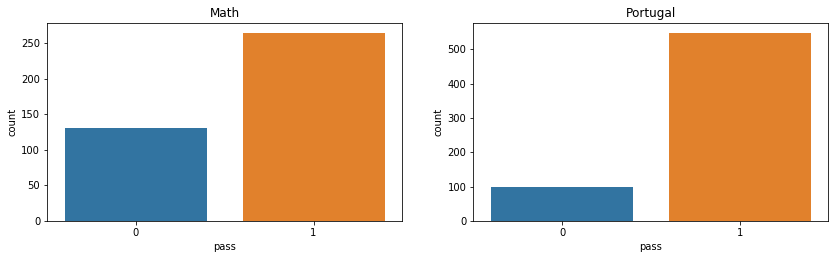

In [20]:
fig = plt.figure(figsize = (14,8))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)

sns.countplot(y_math_pass, ax=ax1)
ax1.set_title('Math')
sns.countplot(y_port_pass, ax=ax2)
ax2.set_title('Portugal')

In [21]:
print( math.shape, X_math.shape, y_math.shape, '\n',
     port.shape, X_port.shape, y_port.shape)

(395, 34) (395, 45) (395,) 
 (649, 34) (649, 45) (649,)


##  Task 3: Exploratory analysis of the data via visualization

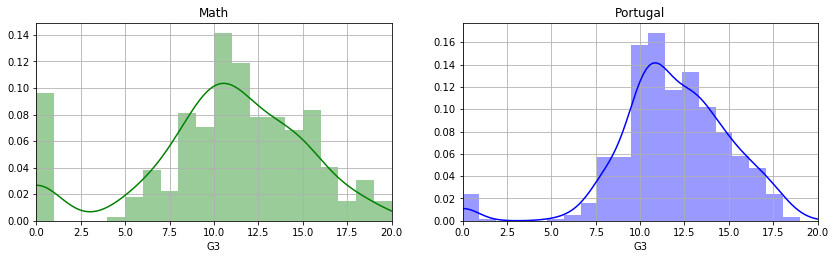

In [22]:
fig = plt.figure(figsize = (14,8))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)

sns.distplot(math['G3'], color='g', bins=20, hist_kws={'alpha': 0.4},ax=ax1)
ax1.set_title('Math')
ax1.set_xlim(0,20)
ax1.grid()
sns.distplot(port['G3'], color='b', bins=20, hist_kws={'alpha': 0.4},ax=ax2)
ax2.set_title('Portugal')
ax2.set_xlim(0,20)
ax2.grid()

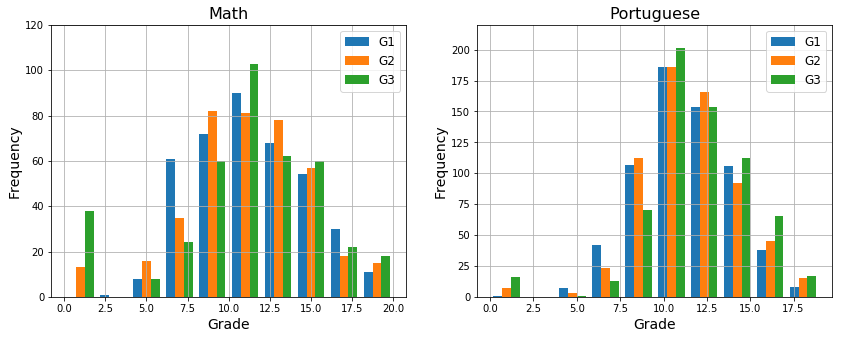

In [23]:
fig = plt.figure(figsize=(14,5))
ax1 = plt.subplot(121)
plt.hist([math['G1'], math['G2'], math['G3']], label=['G1', 'G2', 'G3'])
plt.legend(fontsize=12)
plt.xlabel('Grade', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Math', fontsize=16)
plt.ylim(0,120)
plt.grid()

ax2 = plt.subplot(122)
plt.hist([port['G1'], port['G2'], port['G3']], label=['G1', 'G2', 'G3'])
plt.legend(fontsize=12)
plt.xlabel('Grade', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Portuguese', fontsize=16)
plt.ylim(0,220)
plt.grid()

plt.show()

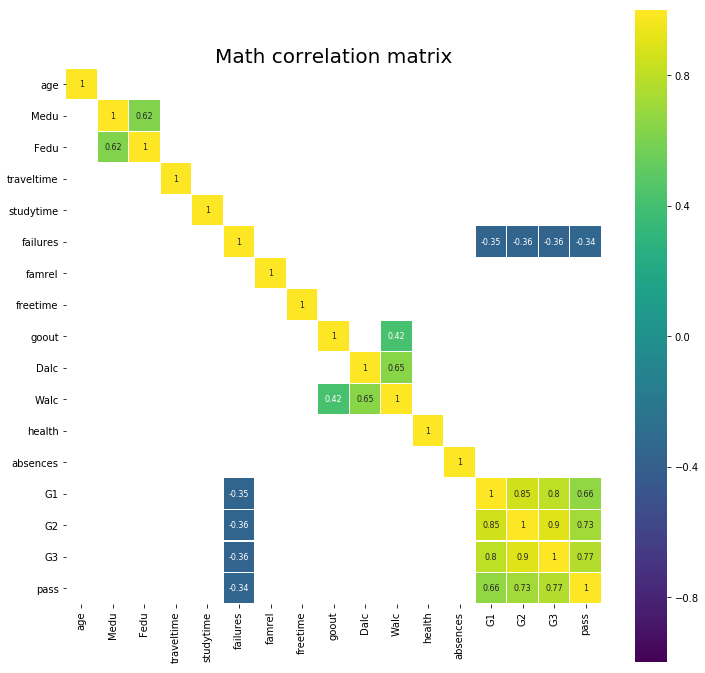

In [24]:
corr = math.corr()
plt.figure(figsize=(12, 12))
plt.title("Math correlation matrix", fontsize=20)
sns.heatmap(corr[(corr >= 0.4) | (corr <= -0.3)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

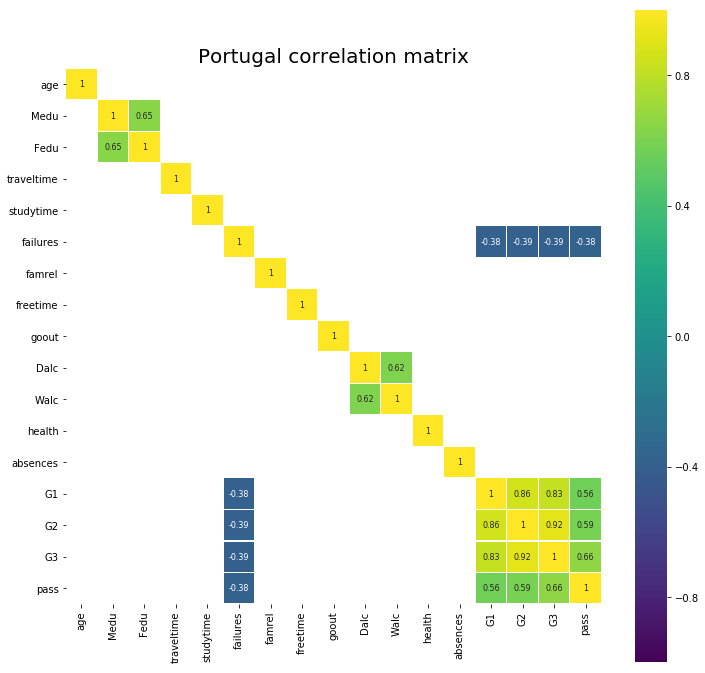

In [25]:
corr = port.corr()
plt.figure(figsize=(12, 12))
plt.title("Portugal correlation matrix", fontsize=20)

sns.heatmap(corr[(corr >= 0.4) | (corr <= -0.3)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

Add new feature alc of alcohol which will change Walc and Dalc 

In [26]:
X_math['alc'] = (X_math.Walc*2 + X_math.Dalc*5)/7
X_port['alc'] = (X_port.Walc*2 + X_port.Dalc*5)/7

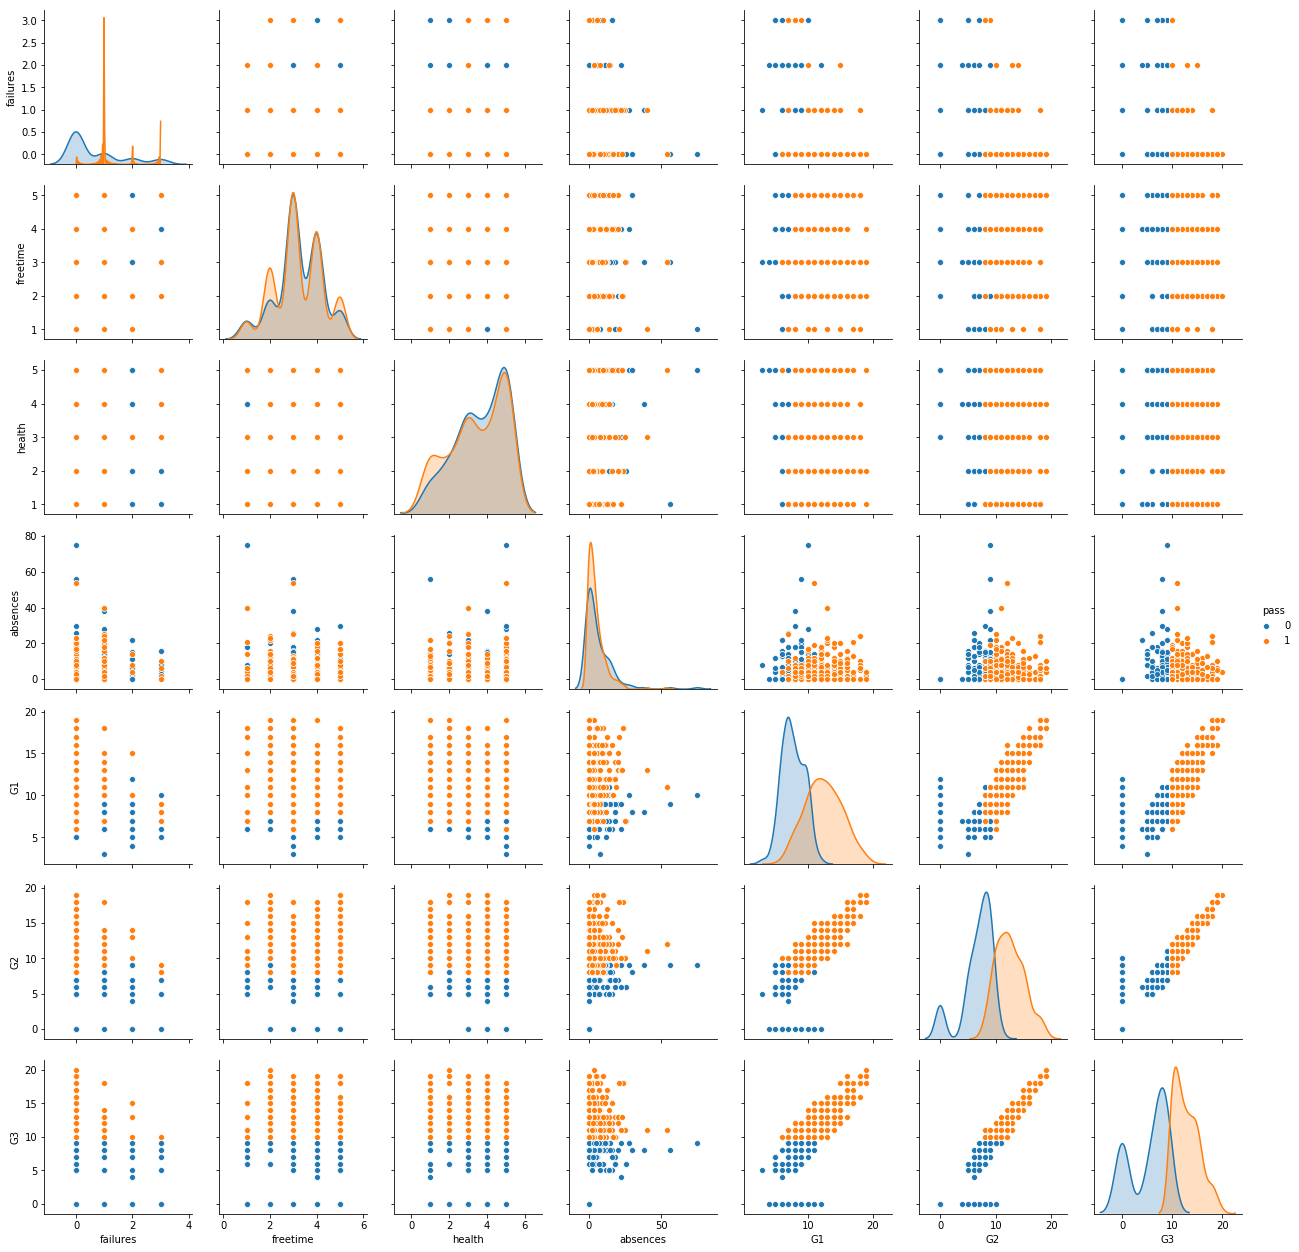

In [27]:
sns.pairplot(math,hue="pass",vars=[ 'failures','freetime', 'health', 'absences', 'G1', 'G2','G3']);

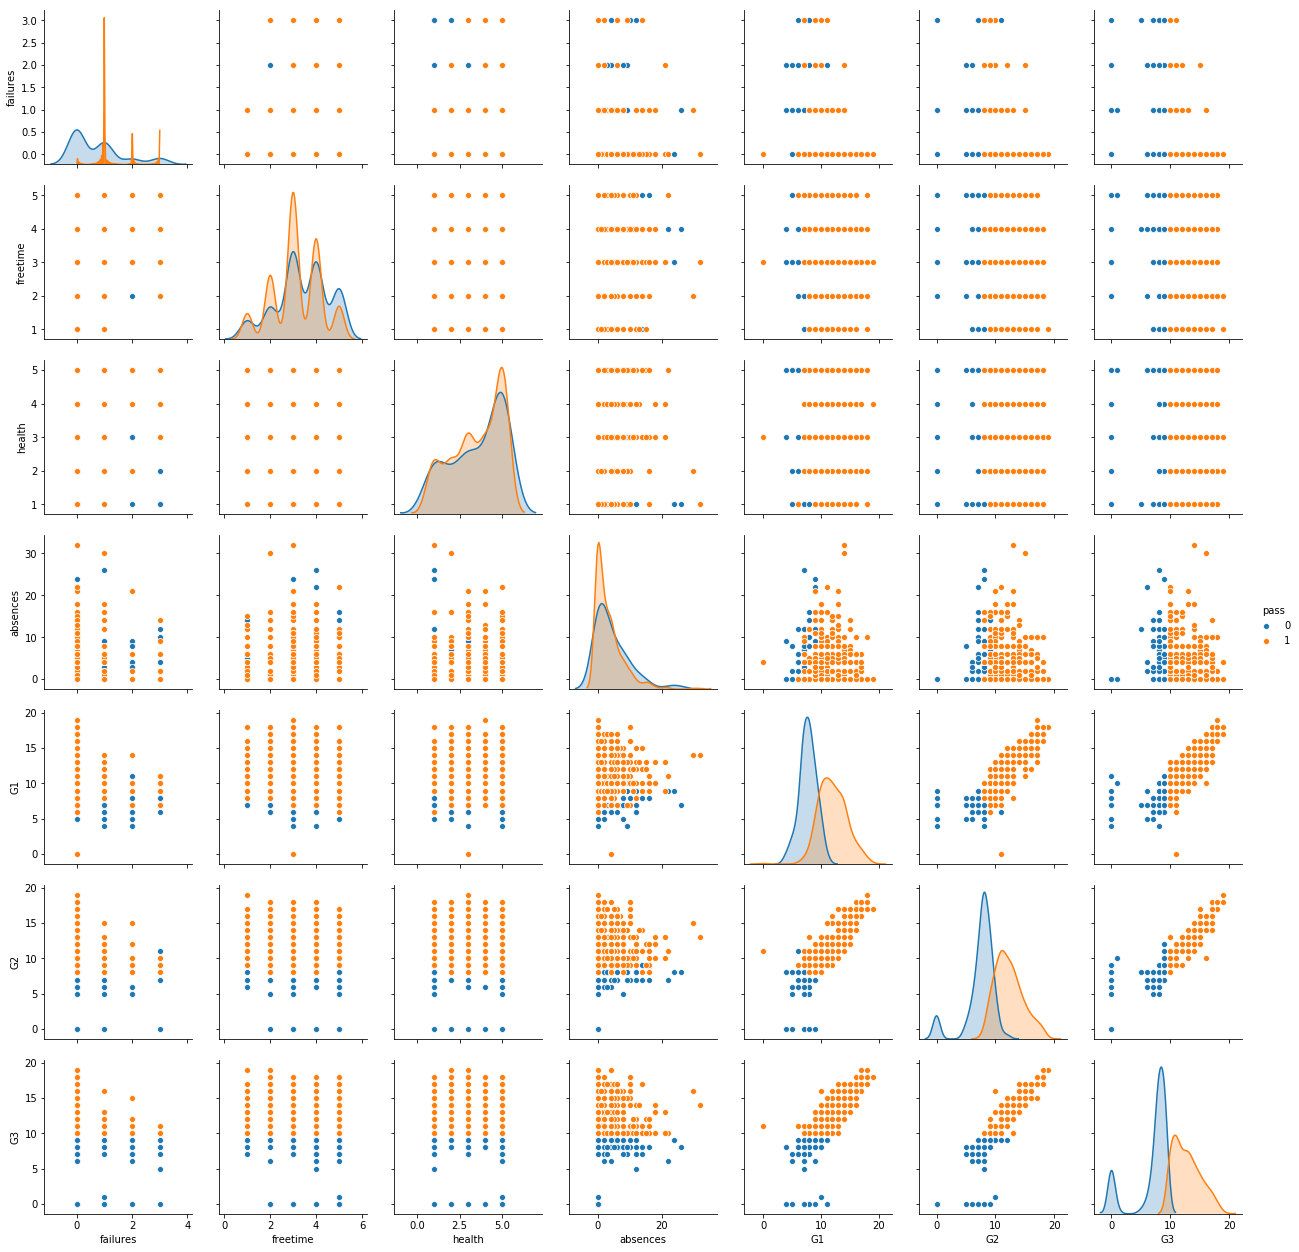

In [28]:
sns.pairplot(port,hue="pass",vars=[ 'failures','freetime', 'health', 'absences', 'G1', 'G2','G3']);

We can see strong correlation between G3 and G1,G2 that is why we will train our datacet in 2 variants:

- X with G1,G2
- X without G1,G2

I will do it after looking correlations od X_math and X_port

Add new feature alc of alcohol which may be replace Walc and Dalc 

In [29]:
X_math['alc'] = (X_math.Walc*2 + X_math.Dalc*5)/7
X_port['alc'] = (X_port.Walc*2 + X_port.Dalc*5)/7

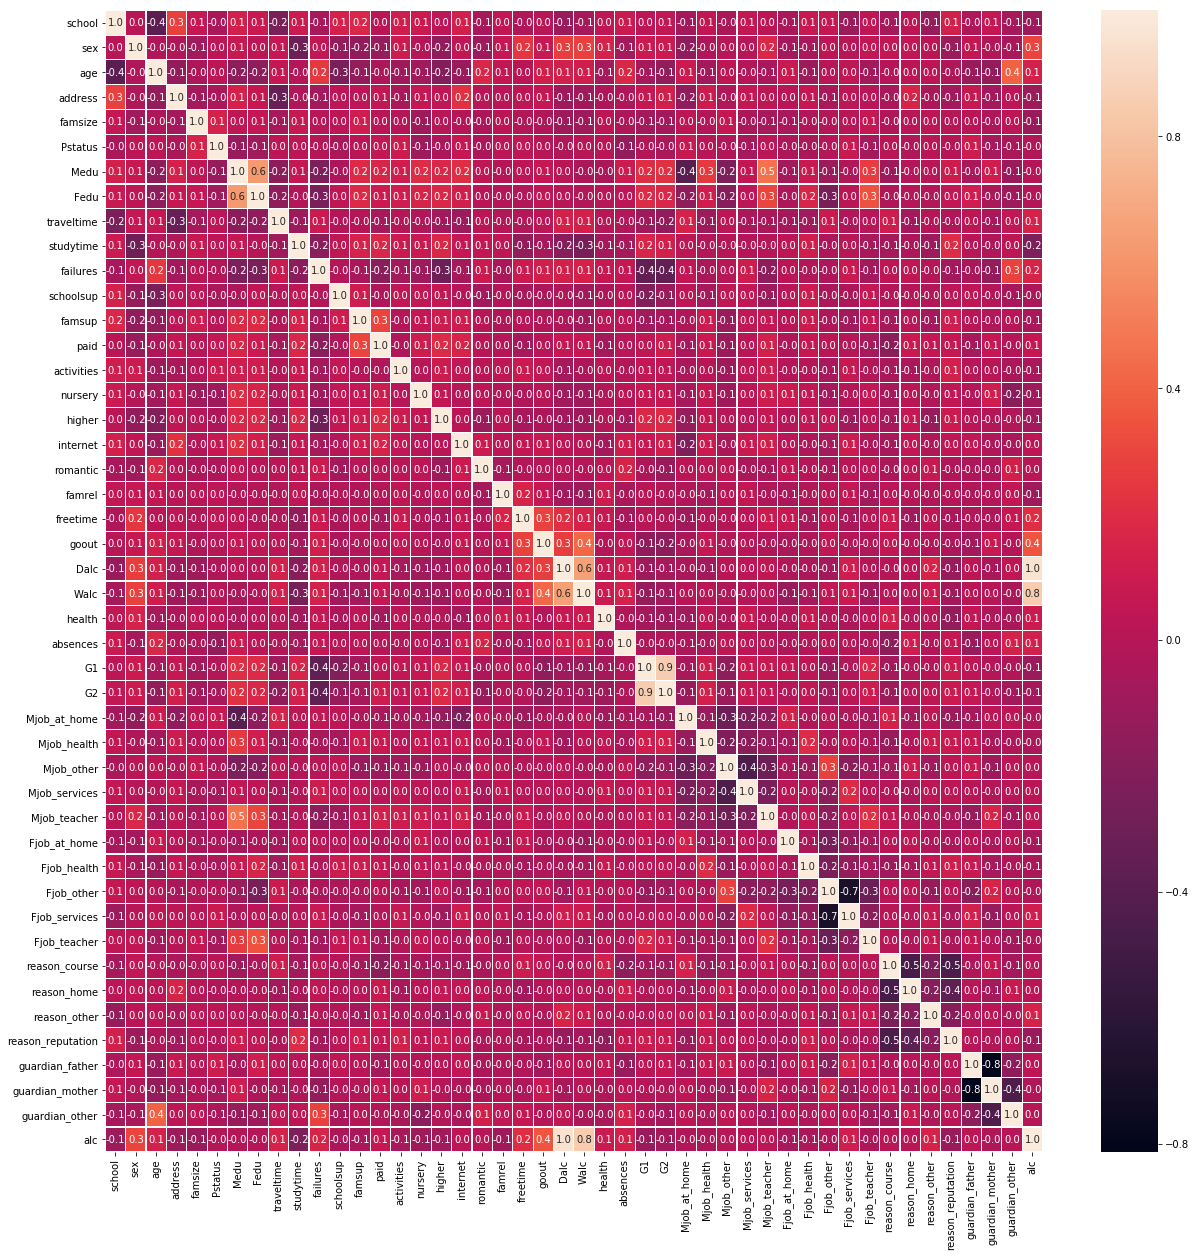

In [30]:
f,ax = plt.subplots(figsize=(21, 21))
sns.heatmap(X_math.corr(), annot=True, linewidths=.1, fmt= '.1f',ax=ax)

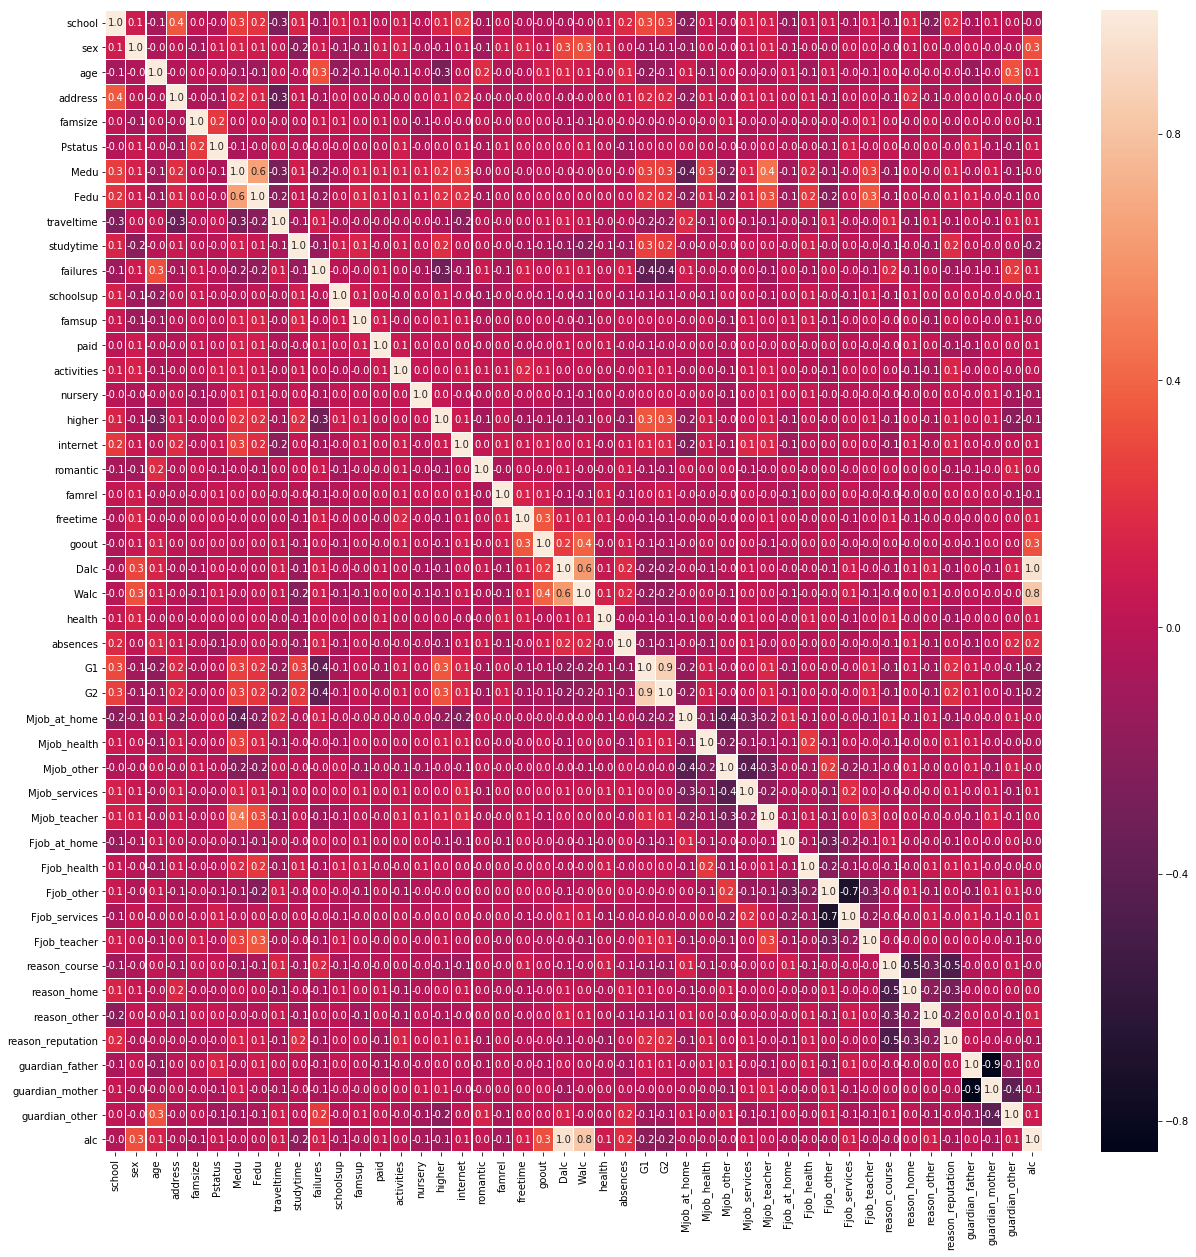

In [31]:
f,ax = plt.subplots(figsize=(21, 21))
sns.heatmap(X_port.corr(), annot=True, linewidths=.1, fmt= '.1f',ax=ax)

We should drop Walc and Dalc because they have big correlation with alc and alc can change them

In [32]:
X_math.drop(columns=['Dalc','Walc'],axis=1, inplace=True)
X_port.drop(columns=['Dalc','Walc'],axis=1, inplace=True)

New train datacets

In [33]:
X_math_out_G = X_math.drop(['G1','G2'],axis=1)
y_math_out_G = math.loc[:,'G1':'G3']
X_port_out_G = X_port.drop(['G1','G2'],axis=1)
y_port_out_G = port.loc[:,'G1':'G3']

Look some graphics thanks to correlation and results

Text(0.5,1,'Portugal')

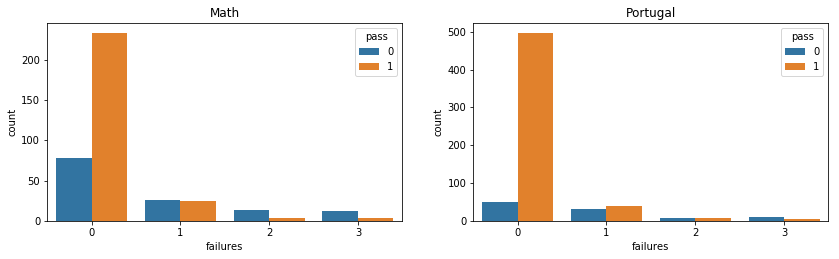

In [34]:
fig = plt.figure(figsize = (14,8))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)

sns.countplot(x='failures',hue='pass',data=math, ax=ax1)
ax1.set_title('Math')
sns.countplot(x='failures',hue='pass',data=port, ax=ax2)
ax2.set_title('Portugal')

There are we can see that probability of fail increase if person didn't pass early

Text(0.5,1,'Portugal')

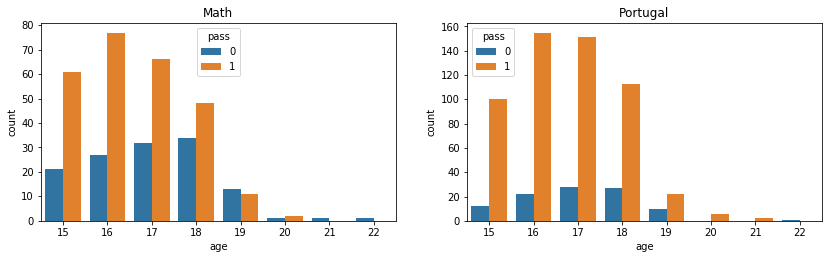

In [35]:
fig = plt.figure(figsize = (14,8))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)

sns.countplot(x='age',hue='pass',data=math, ax=ax1)
ax1.set_title('Math')
sns.countplot(x='age',hue='pass',data=port, ax=ax2)
ax2.set_title('Portugal')

Also there we can see that percent of fail exam students increase after 17 years

In [36]:
pd.crosstab( math['age'] ,math['pass'], normalize=True, margins=True)

pass         0         1       All
age                               
15    0.053165  0.154430  0.207595
16    0.068354  0.194937  0.263291
17    0.081013  0.167089  0.248101
18    0.086076  0.121519  0.207595
19    0.032911  0.027848  0.060759
20    0.002532  0.005063  0.007595
21    0.002532  0.000000  0.002532
22    0.002532  0.000000  0.002532
All   0.329114  0.670886  1.000000

In [37]:
pd.crosstab( port['age'] ,port['pass'], normalize=True, margins=True)

pass         0         1       All
age                               
15    0.018490  0.154083  0.172573
16    0.033898  0.238829  0.272727
17    0.043143  0.232666  0.275809
18    0.041602  0.174114  0.215716
19    0.015408  0.033898  0.049307
20    0.000000  0.009245  0.009245
21    0.000000  0.003082  0.003082
22    0.001541  0.000000  0.001541
All   0.154083  0.845917  1.000000

## Task 4: Build a proper cross-validation procedure; select an appropriate measure of quality. Choose an ML model reasonably; look for a good set of hyperparameters. Use the prepared cross-validation procedure to estimate the quality of prediction.

#### Divide our datasets on 2 subsamples: train for learning and holdout for test

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
Xm_train, Xm_test, ym_train, ym_test = train_test_split(X_math, y_math, test_size = 0.33, random_state=17)
Xp_train, Xp_test, yp_train, yp_test = train_test_split(X_port, y_port, test_size = 0.33, random_state=17)

Appropriate measure of quality for regression:
 - MSE
 - MAE
 - **#MISTAKE!!!** ROC AUC **#MISTAKE!!!**
 
We will use MSE

###### Firstly, I will estimate quality of ML model on DT and RF because they least dependent from emissions

#### Decision Tree

In [40]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

In [41]:
best_params = {}
best_score = 0

#### Create common dataframe for our evaluations

In [109]:
df_evaluation = pd.DataFrame(columns=['dataset','model', 'best_params', 'best_cv', 'test_sc','MSE'])

In [110]:
def DT(X_train, y_train, X_test, y_test,name):
    tree_params = {'max_depth': range(1,21),
               'min_samples_leaf': range(1,100)}
    grid = GridSearchCV(DecisionTreeRegressor(), tree_params, cv=5,n_jobs=-1, verbose=True)
    grid.fit(X_train, y_train)
    print ('Best cross validation: {:.3f}'.format(grid.best_score_))
    global best_score, best_params
    best_score = grid.best_score_
    print ('Best parameters:', grid.best_params_)
    best_params = grid.best_params_
    print ('Test score:', grid.score(X_test, y_test))
    MSE = np.sum((y_test - grid.predict(X_test)) ** 2)
    print('Decision tree regressor, MSE = %.1f' % MSE)
    global df_evaluation 
    df_evaluation = df_evaluation.append({'dataset': name,'model': 'DecisionTree', 'best_params':best_params,
                                          'best_cv': best_score,
                                          'test_sc': grid.score(X_test, y_test),
                                          'MSE': MSE
                                         }, 
                                         ignore_index=True)

In [111]:
DT(Xm_train, ym_train, Xm_test, ym_test,'Math_Grades')

Fitting 5 folds for each of 1980 candidates, totalling 9900 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 5395 tasks      | elapsed:    6.6s


Best cross validation: 0.834
Best parameters: {'max_depth': 5, 'min_samples_leaf': 12}
Test score: 0.8882212628566684
Decision tree regressor, MSE = 336.3


[Parallel(n_jobs=-1)]: Done 9900 out of 9900 | elapsed:   10.5s finished
/home/andrey/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.



In [112]:
df_evaluation

dataset         model                               best_params  \
0  Math_Grades  DecisionTree  {'max_depth': 5, 'min_samples_leaf': 12}   

   best_cv   test_sc         MSE  
0  0.83428  0.888221  336.314062

#### Check our GridSearchCV

In [113]:
from sklearn.model_selection import KFold,cross_val_score
scores = []

In [114]:
def compare_GridSearchCV(model,best_params,X,y):
    for i in range(100):
        clf = model(**best_params)
        cv = KFold(random_state=i, shuffle=True)
        global score
        score = cross_val_score(clf, X, y, cv=cv, n_jobs=-1).mean()
        scores.append(score)

In [115]:
compare_GridSearchCV(DecisionTreeRegressor,best_params,Xm_train,ym_train)

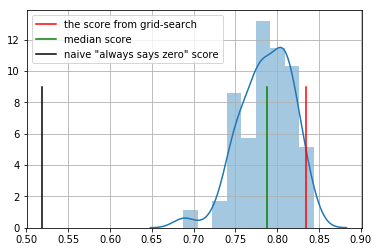

In [116]:
sns.distplot(scores)
# sns.distplot([best_score_]*100)
plt.plot([best_score] * 10 , range(10), 'r', label='the score from grid-search')
plt.plot([np.median(scores)] * 10 , range(10), 'g', label='median score')
plt.plot([np.mean(ym_train/20)] * 10 , range(10), 'k', label='naive "always says zero" score')
plt.grid()
plt.legend()

In [117]:
reg_tree_m = DecisionTreeRegressor(max_depth=9, min_samples_leaf=12)

reg_tree_m.fit(Xm_train, ym_train)
print ('Best cross validation: {:.5f}'.format(np.mean(cross_val_score(reg_tree_m, Xm_train, ym_train, cv=5))))

Best cross validation: 0.83265


In [118]:
reg_tree_m = DecisionTreeRegressor(max_depth=8, min_samples_leaf=12)

reg_tree_m.fit(Xm_train, ym_train)
print ('Best cross validation: {:.5f}'.format(np.mean(cross_val_score(reg_tree_m, Xm_train, ym_train, cv=5))))

Best cross validation: 0.83265


In [119]:
reg_tree_m = DecisionTreeRegressor(max_depth=7, min_samples_leaf=12)

reg_tree_m.fit(Xm_train, ym_train)
print ('Best cross validation: {:.5f}'.format(np.mean(cross_val_score(reg_tree_m, Xm_train, ym_train, cv=5))))

Best cross validation: 0.83464


Best_params for DT = {'max_depth': 9, 'min_samples_leaf': 12}	

we cannot trust GridSearchCV results, but to reduce amount of colculaions I don't re-check  the optimal comination of parameters in every ML model

In [120]:
DT(Xp_train, yp_train, Xp_test, yp_test,'Portugal_Grades')

Fitting 5 folds for each of 1980 candidates, totalling 9900 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 556 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 5056 tasks      | elapsed:    4.7s


Best cross validation: 0.800
Best parameters: {'max_depth': 4, 'min_samples_leaf': 5}
Test score: 0.8785081551420697
Decision tree regressor, MSE = 239.8


[Parallel(n_jobs=-1)]: Done 9900 out of 9900 | elapsed:    8.7s finished
/home/andrey/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.



#### Compare our scores without Grades

In [121]:
Xm_oG_train, Xm_oG_test, ym_oG_train, ym_oG_test = train_test_split(X_math_out_G, y_math, test_size = 0.33, random_state=17)
Xp_oG_train, Xp_oG_test, yp_oG_train, yp_oG_test = train_test_split(X_port_out_G, y_port, test_size = 0.33, random_state=17)

In [122]:
DT(Xm_oG_train, ym_oG_train, Xm_oG_test, ym_oG_test,'Math_out_Grades')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 1980 candidates, totalling 9900 fits


[Parallel(n_jobs=-1)]: Done 664 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 6064 tasks      | elapsed:    4.8s


Best cross validation: 0.242
Best parameters: {'max_depth': 2, 'min_samples_leaf': 1}
Test score: 0.19570889034079134
Decision tree regressor, MSE = 2419.9


[Parallel(n_jobs=-1)]: Done 9900 out of 9900 | elapsed:    7.8s finished
/home/andrey/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.



In [123]:
DT(Xp_oG_train, yp_oG_train, Xp_oG_test, yp_oG_test,'Portugal_out_Grades')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 1980 candidates, totalling 9900 fits


[Parallel(n_jobs=-1)]: Done 656 tasks      | elapsed:    0.9s


Best cross validation: 0.157
Best parameters: {'max_depth': 3, 'min_samples_leaf': 4}
Test score: 0.11930609875642628
Decision tree regressor, MSE = 1738.5


[Parallel(n_jobs=-1)]: Done 9900 out of 9900 | elapsed:    8.3s finished
/home/andrey/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.



In [124]:
df_evaluation

dataset         model  \
0          Math_Grades  DecisionTree   
1      Portugal_Grades  DecisionTree   
2      Math_out_Grades  DecisionTree   
3  Portugal_out_Grades  DecisionTree   

                                best_params   best_cv   test_sc          MSE  
0  {'max_depth': 5, 'min_samples_leaf': 12}  0.834280  0.888221   336.314062  
1   {'max_depth': 4, 'min_samples_leaf': 5}  0.800113  0.878508   239.821511  
2   {'max_depth': 2, 'min_samples_leaf': 1}  0.241965  0.195709  2419.909341  
3   {'max_depth': 3, 'min_samples_leaf': 4}  0.156788  0.119306  1738.465184

In [125]:
from plotly import tools
import plotly.plotly as py
import plotly.graph_objs as go

#### You can look that I maybe choose another best parameters for visualization because I didn't set random_state

In [126]:
tree_m = DecisionTreeRegressor(max_depth=6,min_samples_leaf=12).fit(Xm_train, ym_train)
trace1 = go.Bar(x=tree_m.feature_importances_, y=X_math.columns, orientation = 'h')

tree_p = DecisionTreeRegressor(max_depth=4,min_samples_leaf=5).fit(Xp_train, yp_train)
trace2 = go.Bar(x=tree_p.feature_importances_, y=X_port.columns, orientation = 'h')

tree_m_o_G = DecisionTreeRegressor(max_depth=2,min_samples_leaf=1).fit(Xm_oG_train, ym_oG_train)
trace3 = go.Bar(x=tree_m_o_G.feature_importances_, y=X_math_out_G.columns, orientation = 'h')

tree_p_o_G = DecisionTreeRegressor(max_depth=3,min_samples_leaf=4).fit(Xp_oG_train, yp_oG_train)
trace4 = go.Bar(x=tree_p_o_G.feature_importances_, y=X_port_out_G.columns, orientation = 'h')

fig = tools.make_subplots(rows=2, cols=2, subplot_titles=('Math with G1, G2', 'Portugal with G1, G2',
                                                          'Math without G1, G2', 'Portugal without G1, G2'))

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig.append_trace(trace3, 2, 1)
fig.append_trace(trace4, 2, 2)

fig['layout'].update(height=900, width=900,showlegend=False, title='Multiple tree Subplots on different datasets')

iplot(fig)

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]
[ (2,1) x3,y3 ]  [ (2,2) x4,y4 ]



In [127]:
from sklearn.externals.six import StringIO  
import pydotplus as pydot
from IPython.display import Image  
from sklearn.tree import export_graphviz

def show_tree(clf,data,y):
    dot_data = StringIO()  
    export_graphviz(clf, out_file=dot_data,  
                    feature_names=data.columns,  
                    class_names=y.values,  
                    filled=True, rounded=True,  
                    special_characters=True)  
    graph = pydot.graph_from_dot_data(dot_data.getvalue())  
    return Image(graph.create_png())

Let's visualize trees

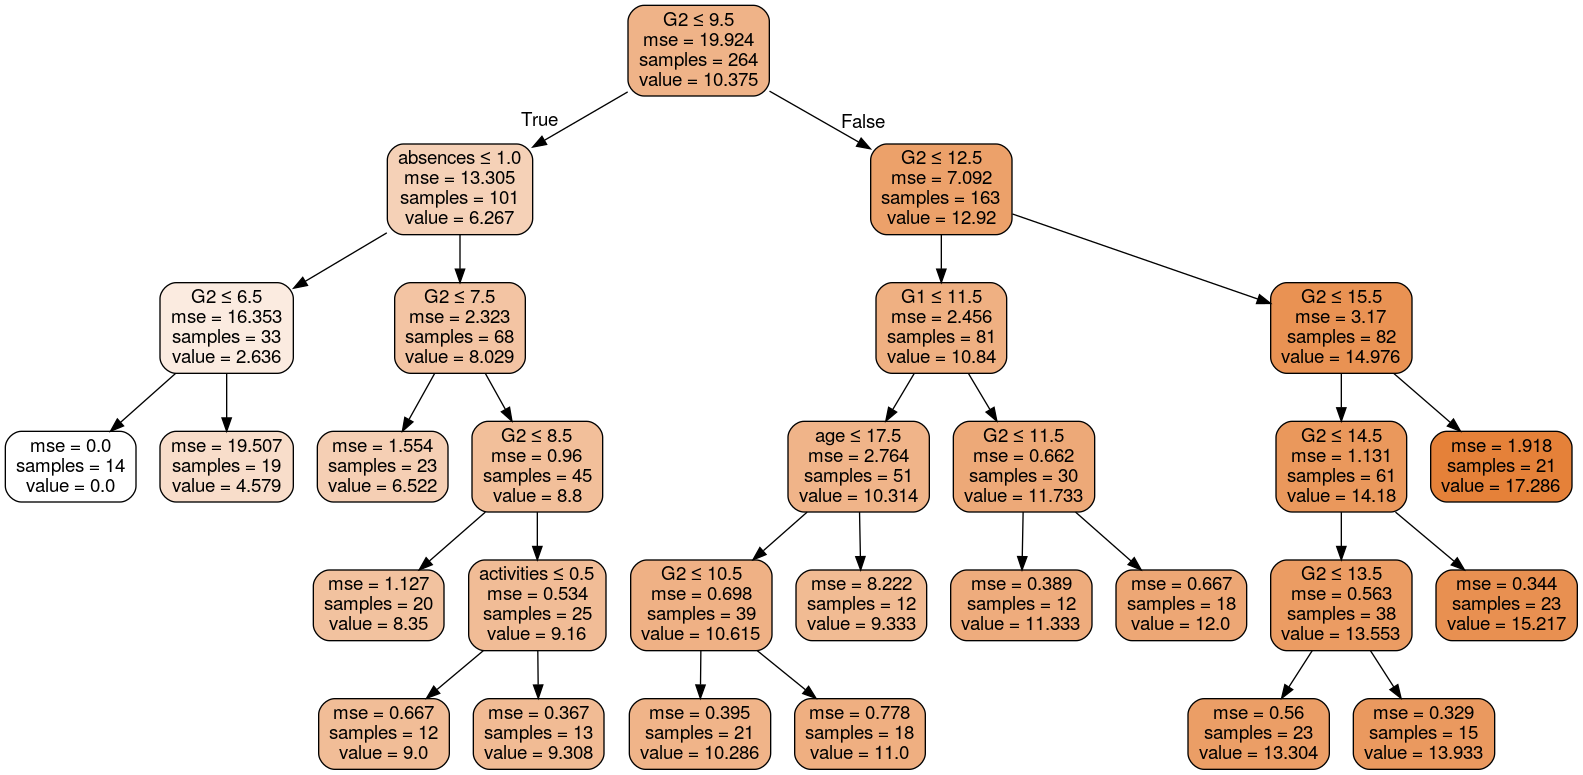

In [128]:
show_tree(tree_m,X_math,y_math)

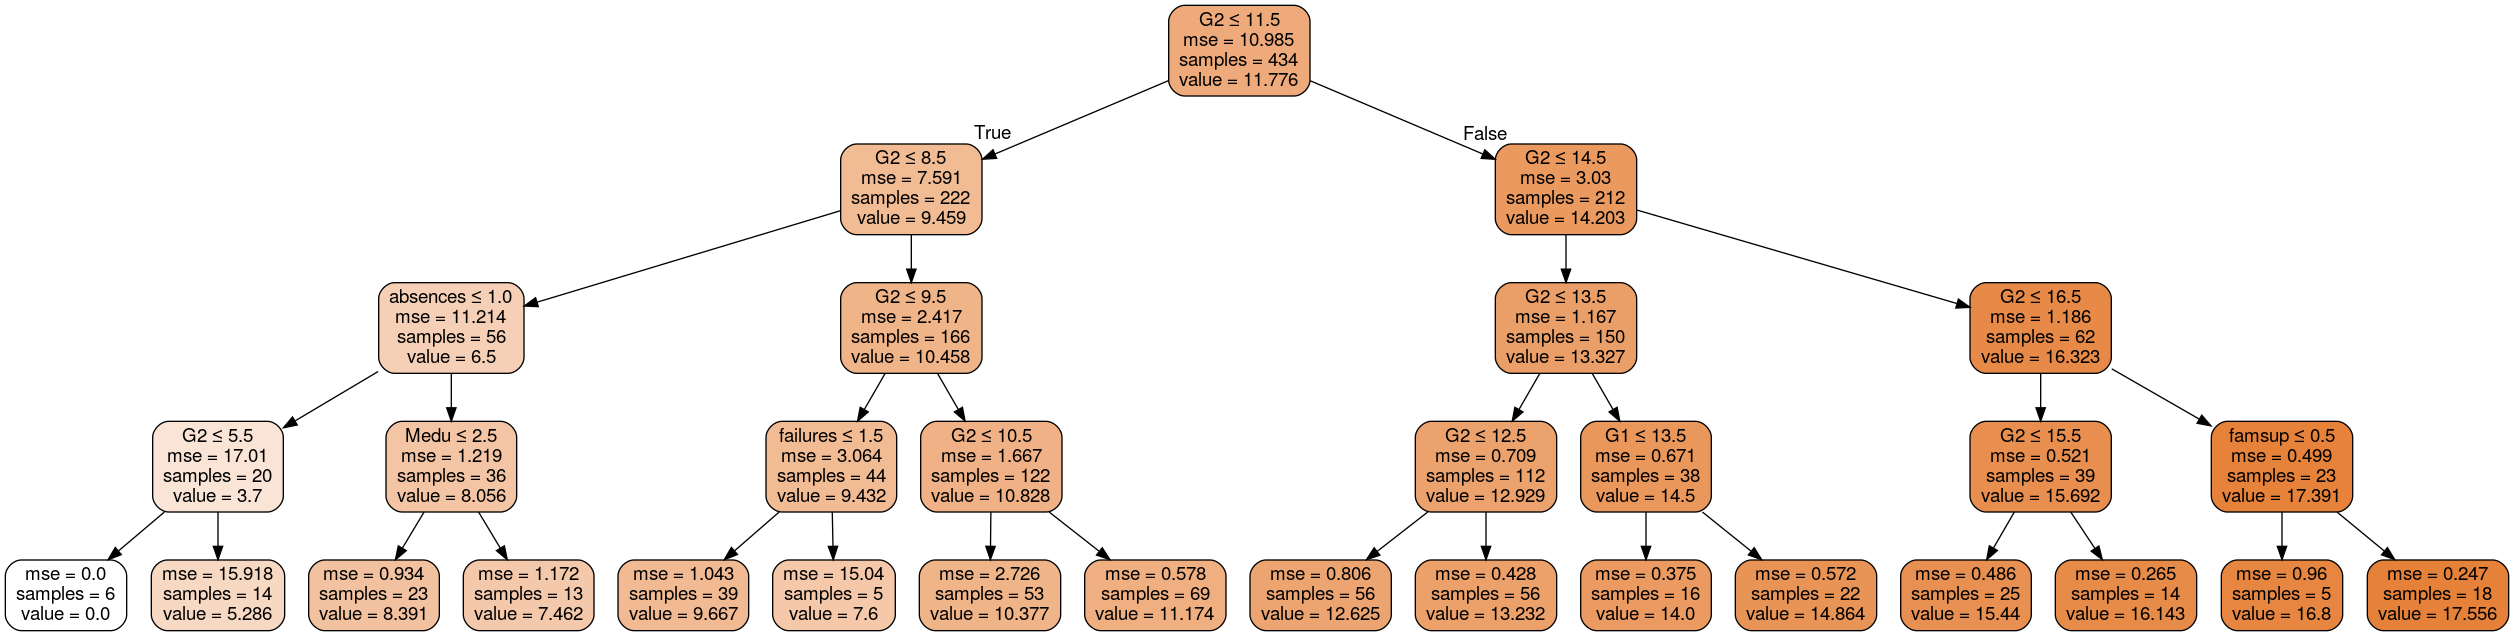

In [129]:
show_tree(tree_p,X_port,y_port)

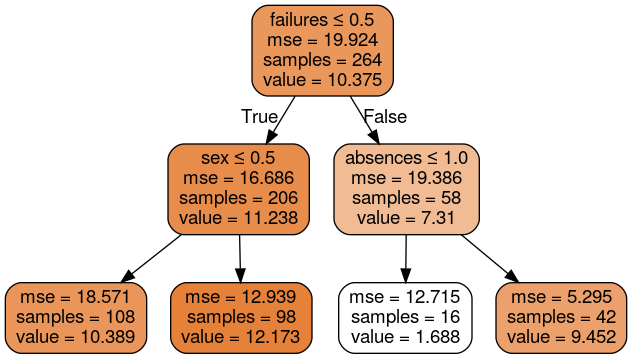

In [130]:
show_tree(tree_m_o_G,X_math_out_G,y_math)

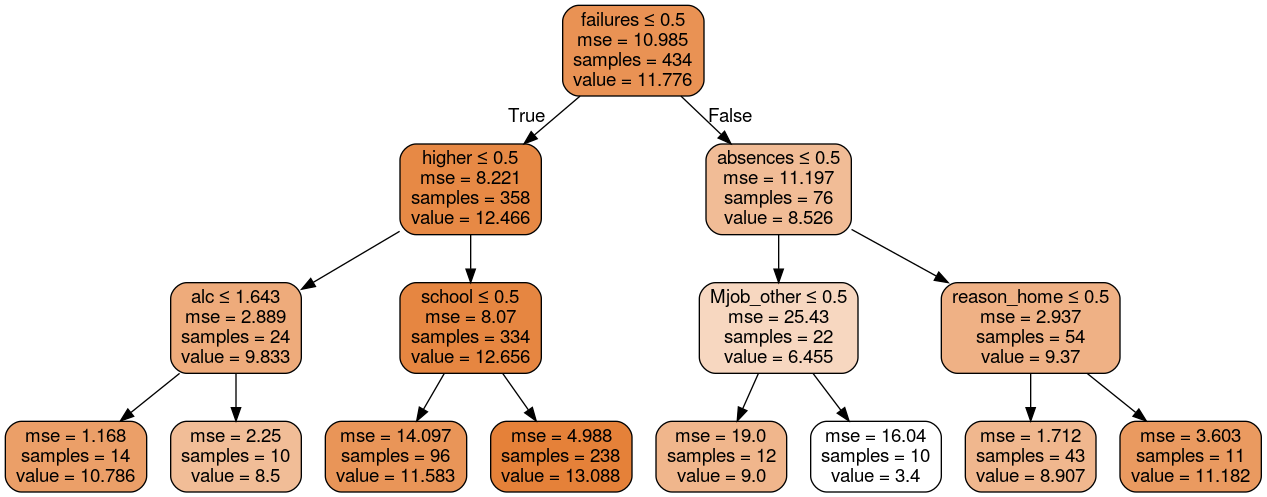

In [131]:
show_tree(tree_p_o_G,X_port_out_G,y_port)

#### As we can conclude that datasets without grades have bad prediction
#### That is why we will not use it

### Random Forest

In [132]:
from sklearn.ensemble import RandomForestRegressor

def RF (X_train, y_train, X_test, y_test,name):
    param_grid = {'max_depth': range(1,21),
                 'min_samples_leaf': range(1,21)}
    grid = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, n_jobs=-1)
    grid.fit(X_train, y_train)
    print ('Best cross validation score: {:.3f}'.format(grid.best_score_))
    global best_score, best_params
    best_score = grid.best_score_
    print ('Best parameters:', grid.best_params_)
    best_params = grid.best_params_
    print ('Test score:', grid.score(X_test, y_test))
    MSE = np.sum((y_test - grid.predict(X_test)) ** 2)
    print('Random forest regressor, MSE = %.2f' % MSE)
    global df_evaluation 
    df_evaluation = df_evaluation.append({'dataset': name,'model': 'RandomForest', 'best_params':best_params,
                                          'best_cv': best_score,
                                          'test_sc': grid.score(X_test, y_test),
                                          'MSE': MSE
                                         }, 
                                         ignore_index=True)


In [133]:
RF(Xm_train, ym_train, Xm_test, ym_test,'Math_Grades')

Best cross validation score: 0.859
Best parameters: {'max_depth': 17, 'min_samples_leaf': 6}
Test score: 0.8943208650687424
Random forest regressor, MSE = 317.96


/home/andrey/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.



In [134]:
RF(Xp_train, yp_train, Xp_test, yp_test,'Portugal_Grades')

Best cross validation score: 0.825
Best parameters: {'max_depth': 14, 'min_samples_leaf': 8}
Test score: 0.8714296321802054
Random forest regressor, MSE = 253.79


In [135]:
df_evaluation

dataset         model  \
0          Math_Grades  DecisionTree   
1      Portugal_Grades  DecisionTree   
2      Math_out_Grades  DecisionTree   
3  Portugal_out_Grades  DecisionTree   
4          Math_Grades  RandomForest   
5      Portugal_Grades  RandomForest   

                                best_params   best_cv   test_sc          MSE  
0  {'max_depth': 5, 'min_samples_leaf': 12}  0.834280  0.888221   336.314062  
1   {'max_depth': 4, 'min_samples_leaf': 5}  0.800113  0.878508   239.821511  
2   {'max_depth': 2, 'min_samples_leaf': 1}  0.241965  0.195709  2419.909341  
3   {'max_depth': 3, 'min_samples_leaf': 4}  0.156788  0.119306  1738.465184  
4  {'max_depth': 17, 'min_samples_leaf': 6}  0.859045  0.894321   317.961896  
5  {'max_depth': 14, 'min_samples_leaf': 8}  0.825327  0.871430   253.794318

In [136]:
rforest_m = RandomForestRegressor(max_depth=15,min_samples_leaf=5).fit(Xm_train, ym_train)
trace1 = go.Bar(x=rforest_m.feature_importances_, y=X_math.columns, orientation = 'h')

rforest_p = RandomForestRegressor(max_depth=18,min_samples_leaf=6).fit(Xp_train, yp_train)
trace2 = go.Bar(x=rforest_p.feature_importances_, y=X_port.columns, orientation = 'h')


fig = tools.make_subplots(rows=1, cols=2, subplot_titles=('Math with G1, G2', 'Portugal with G1, G2'))

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)

fig['layout'].update(height=900, width=900,showlegend=False, title='Multiple random forest Subplots on different datasets')

iplot(fig)

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



Let's visualize tree from Random Forest

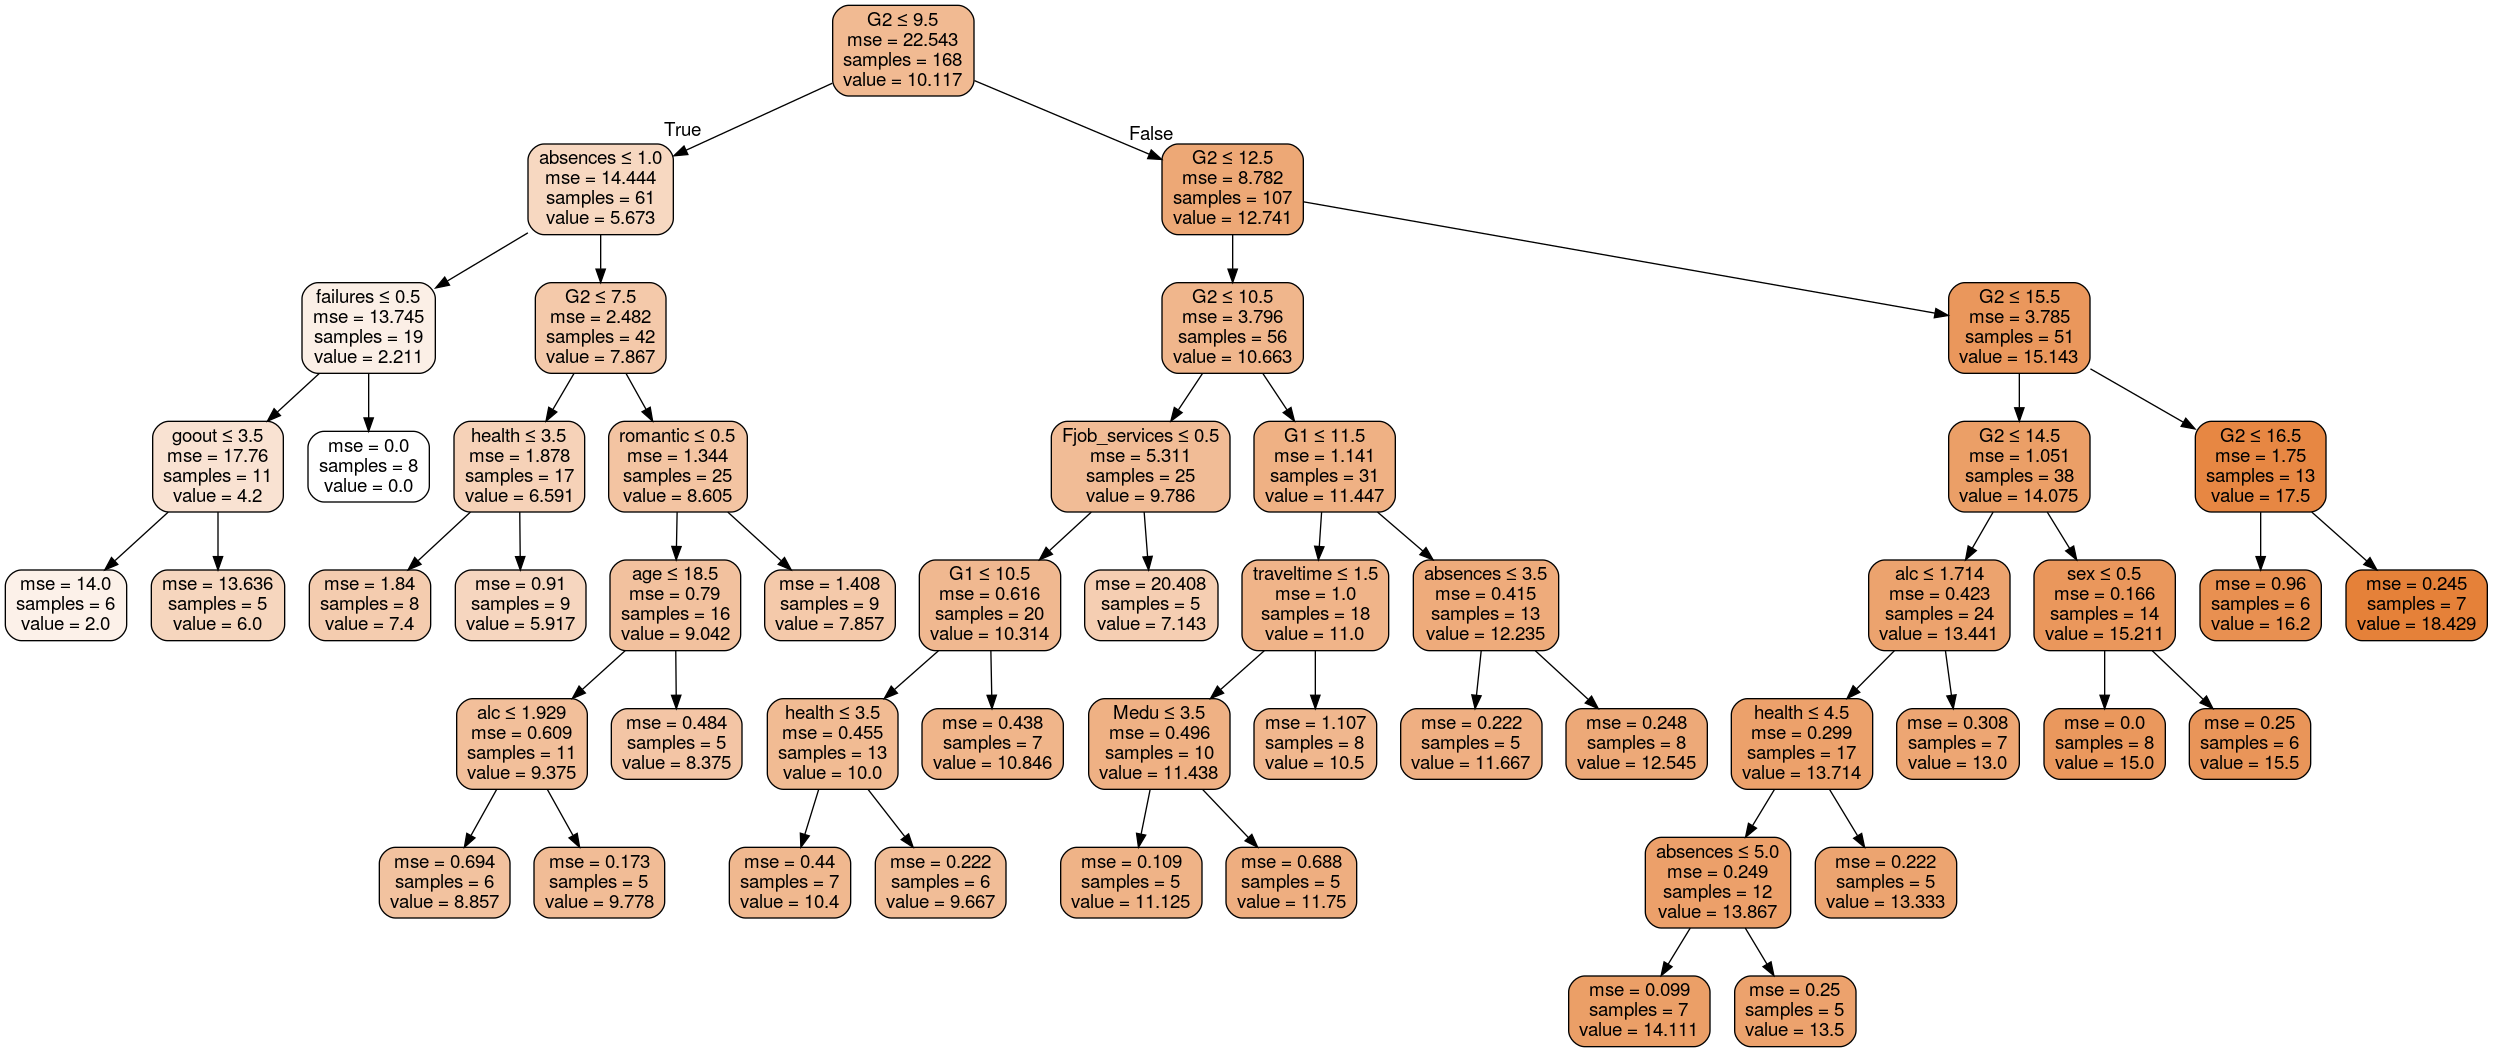

In [137]:
show_tree(rforest_m.estimators_[5],X_math,y_math)

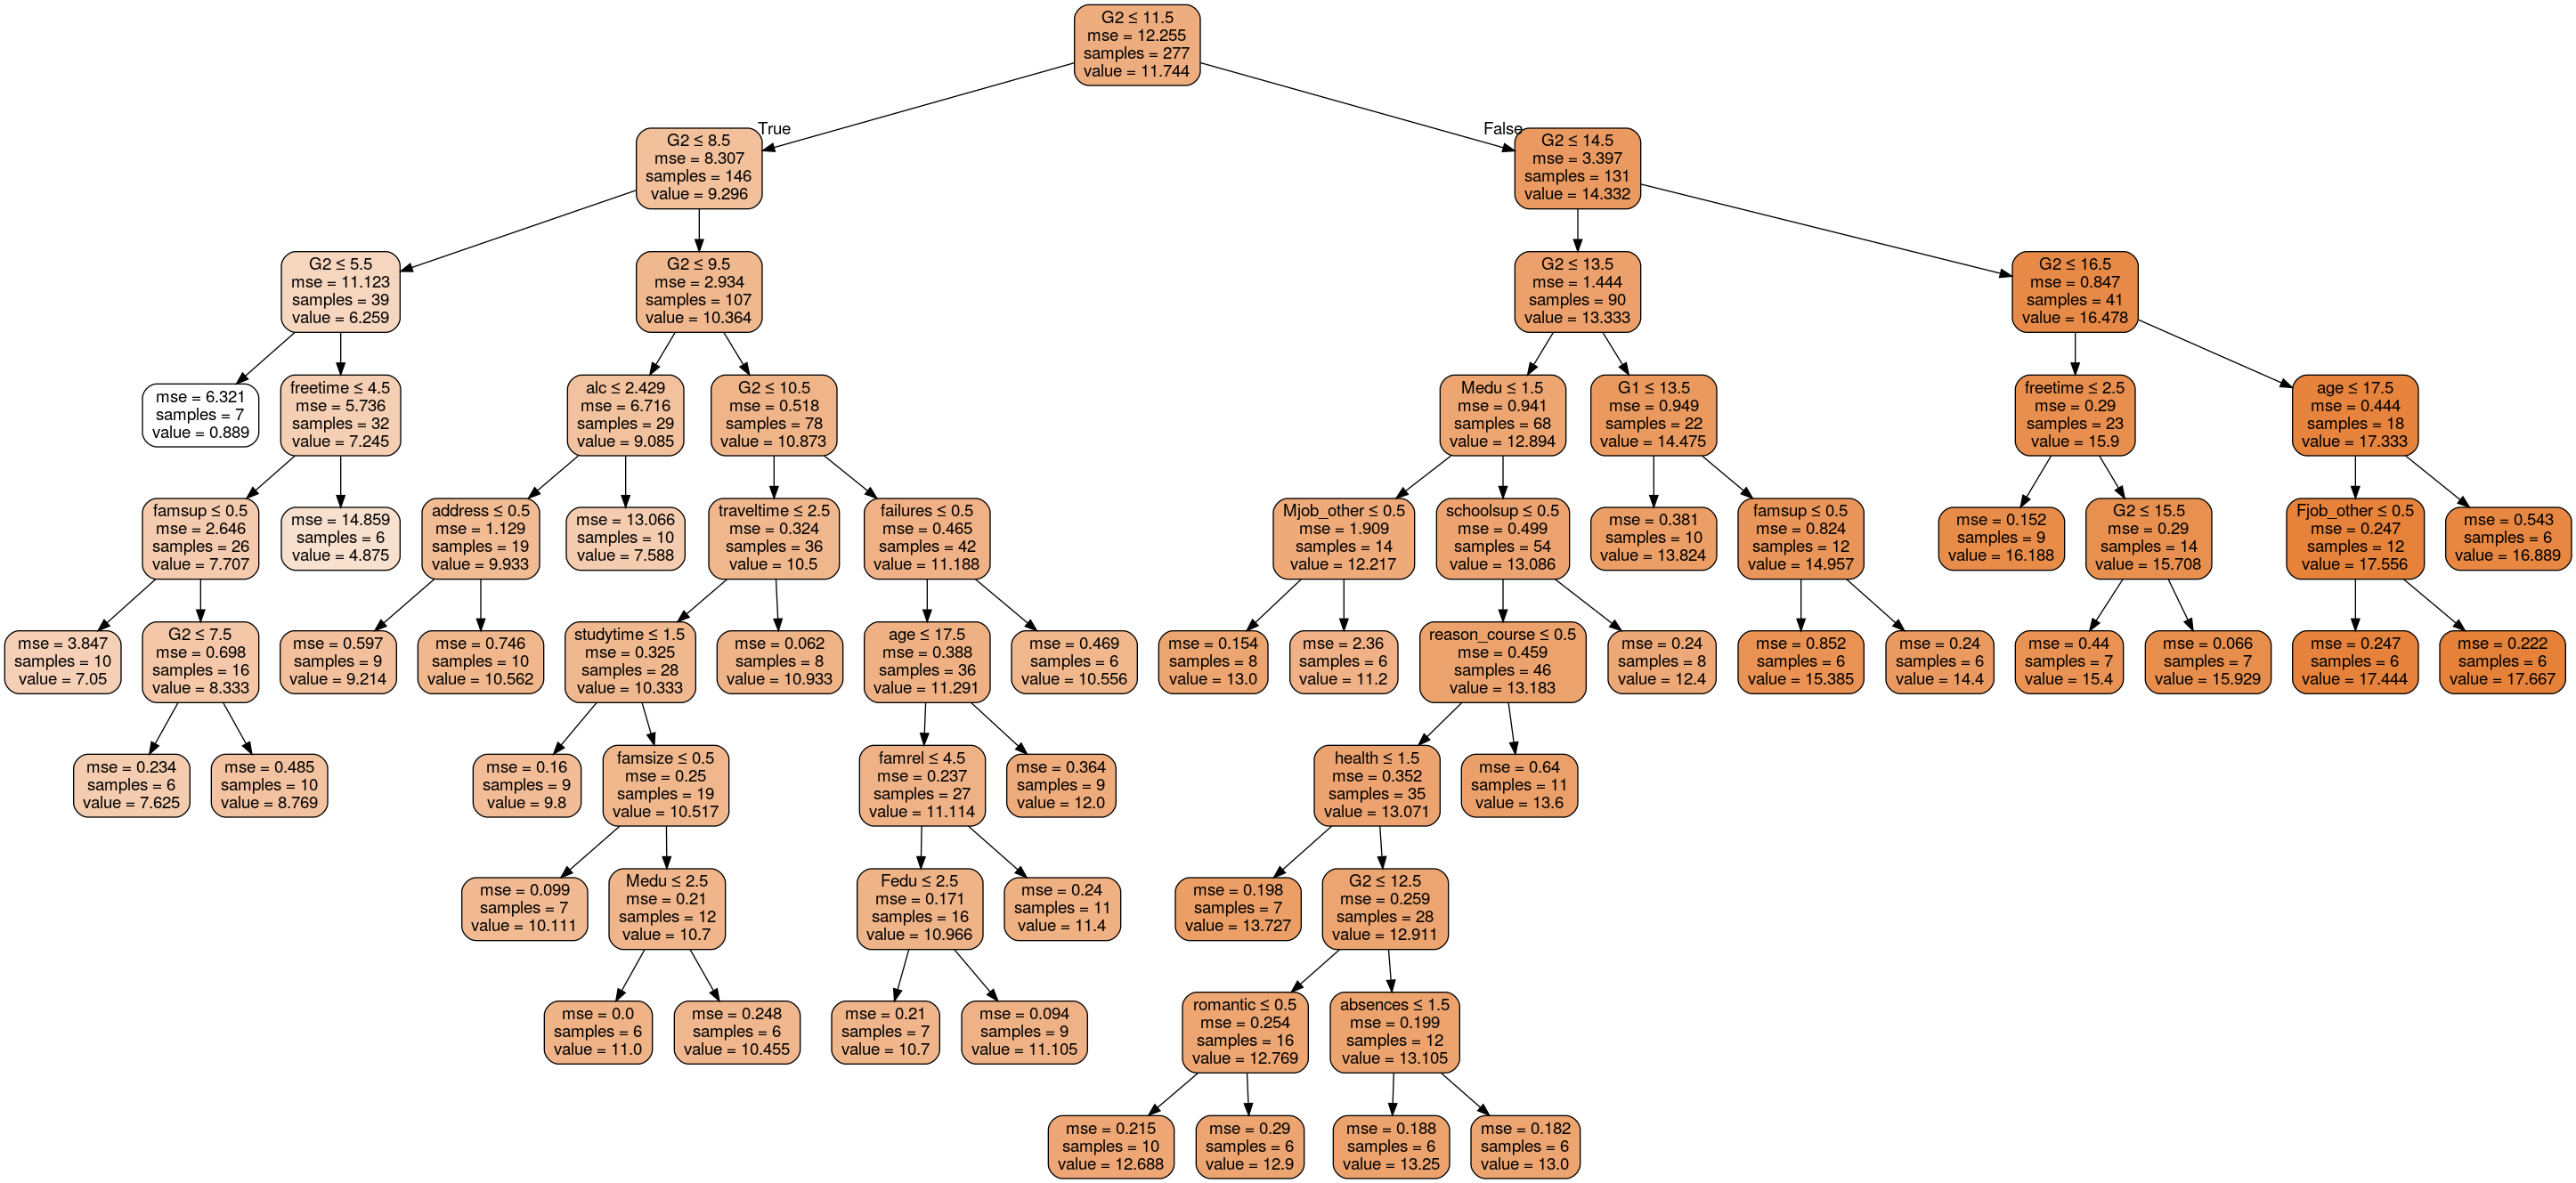

In [138]:
show_tree(rforest_p.estimators_[5],X_port,y_port)

## Gradient boosting

In [139]:
from sklearn.ensemble import GradientBoostingRegressor
def gboost (X_train, y_train, X_test, y_test,name):
    param_grid = {'max_depth': range(1,10),  'n_estimators':[10,50,100,500,1000]}
    grid = GridSearchCV(GradientBoostingRegressor(), param_grid, cv=5,n_jobs=-1)
    grid.fit(X_train, y_train)
    print ('Best cross validation score: {:.2f}'.format(grid.best_score_))
    global best_score, best_params
    best_score = grid.best_score_
    print ('Best parameters:', grid.best_params_)
    best_params = grid.best_params_
    print ('Test score:', grid.score(X_test, y_test))
    MSE = np.sum((y_test - grid.predict(X_test)) ** 2)
    print('Gradient boosting, MSE = %.2f' % MSE)
    global df_evaluation 
    df_evaluation = df_evaluation.append({'dataset': name,'model': 'GradientBoosting', 'best_params':best_params,
                                          'best_cv': best_score,
                                          'test_sc': grid.score(X_test, y_test),
                                          'MSE': MSE
                                         }, 
                                         ignore_index=True)


In [140]:
gboost(Xm_train, ym_train, Xm_test, ym_test,'Math_Grades')

Best cross validation score: 0.86
Best parameters: {'max_depth': 2, 'n_estimators': 50}
Test score: 0.8907663133775842
Gradient boosting, MSE = 328.66


/home/andrey/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.



In [141]:
gboost(Xp_train, yp_train, Xp_test, yp_test,'Portugal_Grades')

Best cross validation score: 0.81
Best parameters: {'max_depth': 1, 'n_estimators': 100}
Test score: 0.8930026658685317
Gradient boosting, MSE = 211.21


/home/andrey/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.



In [142]:
df_evaluation

dataset             model  \
0          Math_Grades      DecisionTree   
1      Portugal_Grades      DecisionTree   
2      Math_out_Grades      DecisionTree   
3  Portugal_out_Grades      DecisionTree   
4          Math_Grades      RandomForest   
5      Portugal_Grades      RandomForest   
6          Math_Grades  GradientBoosting   
7      Portugal_Grades  GradientBoosting   

                                best_params   best_cv   test_sc          MSE  
0  {'max_depth': 5, 'min_samples_leaf': 12}  0.834280  0.888221   336.314062  
1   {'max_depth': 4, 'min_samples_leaf': 5}  0.800113  0.878508   239.821511  
2   {'max_depth': 2, 'min_samples_leaf': 1}  0.241965  0.195709  2419.909341  
3   {'max_depth': 3, 'min_samples_leaf': 4}  0.156788  0.119306  1738.465184  
4  {'max_depth': 17, 'min_samples_leaf': 6}  0.859045  0.894321   317.961896  
5  {'max_depth': 14, 'min_samples_leaf': 8}  0.825327  0.871430   253.794318  
6      {'max_depth': 2, 'n_estimators': 50}  0.861299  0.890766   328.656646  
7     {'max_depth': 1, 'n_estimators': 100}  0.811950  0.893003   211.209752

In [143]:
gradboosting_m = GradientBoostingRegressor(max_depth=2, n_estimators=50).fit(Xm_train, ym_train)
trace1 = go.Bar(x=gradboosting_m.feature_importances_, y=X_math.columns, orientation = 'h')

gradboosting_p = GradientBoostingRegressor(max_depth=1, n_estimators=100).fit(Xp_train, yp_train)
trace2 = go.Bar(x=gradboosting_p.feature_importances_, y=X_port.columns, orientation = 'h')

fig = tools.make_subplots(rows=1, cols=2, subplot_titles=('Math with G1, G2', 'Portugal with G1, G2'))

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)

fig['layout'].update(height=900, width=900,showlegend=False, title='Multiple random forest Subplots on different datasets')

iplot(fig)


This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



## New begin

#### Parametric methods and knn require symmetric and  unimodal distribution thats why we should normalize only non dummy variables of our data 

In [144]:
from scipy.stats import shapiro
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [145]:
shapiro(Xm_train)
# значение статистики, p-value 

/home/andrey/anaconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:1309: UserWarning:

p-value may not be accurate for N > 5000.



(0.5198550820350647, 0.0)

In [146]:
shapiro(StandardScaler().fit_transform(Xm_train))
# с таким p-value придется отклонять нулевую гипотезу о нормальности данных

/home/andrey/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning:

Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.

/home/andrey/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning:

Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.

/home/andrey/anaconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:1309: UserWarning:

p-value may not be accurate for N > 5000.



(0.9616071581840515, 0.0)

In [147]:
Xm_train.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'G1', 'G2', 'Mjob_at_home',
       'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher',
       'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services',
       'Fjob_teacher', 'reason_course', 'reason_home', 'reason_other',
       'reason_reputation', 'guardian_father', 'guardian_mother',
       'guardian_other', 'alc'],
      dtype='object')

In [148]:
def standartalize (X):
    X_nodummy = X[[ 'absences','age','failures']]
    X_dummy = X[['school', 'sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'traveltime', 'studytime', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'G1', 'G2', 'Mjob_at_home',
       'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher',
       'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services',
       'Fjob_teacher', 'reason_course', 'reason_home', 'reason_other',
       'reason_reputation', 'guardian_father', 'guardian_mother',
       'guardian_other', 'alc']]
    scaler = MinMaxScaler()
    standart = StandardScaler()
    scaler.fit(X_nodummy)
    standart.fit(X_nodummy)
    X_nodummy_scaled = scaler.transform(X_nodummy)
    X_nodummy_standart = standart.transform(X_nodummy)

    X_scaled = np.concatenate((X_nodummy_scaled, X_dummy.values), axis=1)
    
    X_standart = np.concatenate((X_nodummy_standart, X_dummy.values), axis=1)
    return X_scaled, X_standart

Xm_train_scaled, Xm_train_standart = standartalize(Xm_train)
Xm_test_scaled, Xm_test_standart = standartalize(Xm_test)
Xp_train_scaled, Xp_train_standart = standartalize(Xp_train)
Xp_test_scaled , Xp_test_standart = standartalize(Xp_test)

/home/andrey/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning:

Data with input dtype int64 were all converted to float64 by MinMaxScaler.

/home/andrey/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning:

Data with input dtype int64 were all converted to float64 by StandardScaler.

/home/andrey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: DataConversionWarning:

Data with input dtype int64 were all converted to float64 by StandardScaler.

/home/andrey/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning:

Data with input dtype int64 were all converted to float64 by MinMaxScaler.

/home/andrey/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning:

Data with input dtype int64 were all converted to float64 by StandardScaler.

/home/andrey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:

## New end 

### Lasso Regression (L1)

In [149]:
from sklearn.linear_model import Lasso
def lasso (X_train, y_train, X_test, y_test,name):
    param_grid = {'alpha': [0.01, 0.1, 1, 5, 10, 50, 100]}
    grid = GridSearchCV(Lasso(), param_grid, cv=5)
    grid.fit(X_train, y_train)
    print ('Best cross validation score: {:.3f}'.format(grid.best_score_))
    global best_score, best_params
    best_score = grid.best_score_
    print ('Best parameters:', grid.best_params_)
    best_params = grid.best_params_
    print ('Test score:', grid.score(X_test, y_test))
    MSE = np.sum((y_test - grid.predict(X_test)) ** 2)
    print('Lasso Regression, MSE = %.2f' % MSE)
    global df_evaluation 
    df_evaluation = df_evaluation.append({'dataset': name,'model': 'Lasso', 'best_params':best_params,
                                          'best_cv': best_score,
                                          'test_sc': grid.score(X_test, y_test),
                                          'MSE': MSE
                                         }, 
                                         ignore_index=True)

In [150]:
lasso(Xm_train_standart, ym_train, Xm_test_standart, ym_test,'Math_Grades_stadart')

Best cross validation score: 0.813
Best parameters: {'alpha': 0.1}
Test score: 0.8433143159318635
Lasso Regression, MSE = 471.43


/home/andrey/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.



In [151]:
lasso(Xm_train_scaled, ym_train, Xm_test_scaled, ym_test,'Math_Grades_scaler')

/home/andrey/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.



Best cross validation score: 0.813
Best parameters: {'alpha': 1}
Test score: 0.8329355928708702
Lasso Regression, MSE = 502.65


In [152]:
lasso(Xm_train, ym_train, Xm_test, ym_test,'Math_Grades')

Best cross validation score: 0.815
Best parameters: {'alpha': 1}
Test score: 0.8355793345990521
Lasso Regression, MSE = 494.70


/home/andrey/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.



In [153]:
Xm_train.head()

school  sex  age  address  famsize  Pstatus  Medu  Fedu  traveltime  \
135       1    0   15        1        1        1     4     4           1   
37        1    1   16        0        1        0     4     4           2   
191       1    0   17        1        1        1     1     1           1   
322       1    0   17        0        0        1     2     2           1   
251       1    1   16        1        1        1     3     3           3   

     studytime    ...     Fjob_services  Fjob_teacher  reason_course  \
135          3    ...                 0             0              1   
37           3    ...                 0             1              0   
191          2    ...                 1             0              1   
322          3    ...                 1             0              1   
251          2    ...                 0             0              0   

     reason_home  reason_other  reason_reputation  guardian_father  \
135            0             0                  0                0   
37             0             0                  1                0   
191            0             0                  0                0   
322            0             0                  0                0   
251            0             0                  1                0   

     guardian_mother  guardian_other       alc  
135                1               0  1.000000  
37                 1               0  1.000000  
191                1               0  1.000000  
322                1               0  2.000000  
251                0               1  1.571429  

[5 rows x 44 columns]

In [154]:
lasso(Xp_train_scaled, yp_train, Xp_test_scaled, yp_test,'Portugal_Grades_scaler')

Best cross validation score: 0.830
Best parameters: {'alpha': 0.1}
Test score: 0.8875631951114172
Lasso Regression, MSE = 221.95


In [155]:
lasso(Xp_train_standart, yp_train, Xp_test_standart, yp_test,'Portugal_Grades_standart')

Best cross validation score: 0.829
Best parameters: {'alpha': 0.1}
Test score: 0.8875352977282442
Lasso Regression, MSE = 222.00


In [156]:
lasso(Xp_train, yp_train, Xp_test, yp_test,'Portugal_Grades')

Best cross validation score: 0.830
Best parameters: {'alpha': 0.1}
Test score: 0.8884540808275541
Lasso Regression, MSE = 220.19


In [157]:
df_evaluation

dataset             model  \
0                Math_Grades      DecisionTree   
1            Portugal_Grades      DecisionTree   
2            Math_out_Grades      DecisionTree   
3        Portugal_out_Grades      DecisionTree   
4                Math_Grades      RandomForest   
5            Portugal_Grades      RandomForest   
6                Math_Grades  GradientBoosting   
7            Portugal_Grades  GradientBoosting   
8        Math_Grades_stadart             Lasso   
9         Math_Grades_scaler             Lasso   
10               Math_Grades             Lasso   
11    Portugal_Grades_scaler             Lasso   
12  Portugal_Grades_standart             Lasso   
13           Portugal_Grades             Lasso   

                                 best_params   best_cv   test_sc          MSE  
0   {'max_depth': 5, 'min_samples_leaf': 12}  0.834280  0.888221   336.314062  
1    {'max_depth': 4, 'min_samples_leaf': 5}  0.800113  0.878508   239.821511  
2    {'max_depth': 2, 'min_samples_leaf': 1}  0.241965  0.195709  2419.909341  
3    {'max_depth': 3, 'min_samples_leaf': 4}  0.156788  0.119306  1738.465184  
4   {'max_depth': 17, 'min_samples_leaf': 6}  0.859045  0.894321   317.961896  
5   {'max_depth': 14, 'min_samples_leaf': 8}  0.825327  0.871430   253.794318  
6       {'max_depth': 2, 'n_estimators': 50}  0.861299  0.890766   328.656646  
7      {'max_depth': 1, 'n_estimators': 100}  0.811950  0.893003   211.209752  
8                             {'alpha': 0.1}  0.813300  0.843314   471.427753  
9                               {'alpha': 1}  0.813286  0.832936   502.654716  
10                              {'alpha': 1}  0.814513  0.835579   494.700363  
11                            {'alpha': 0.1}  0.829879  0.887563   221.947115  
12                            {'alpha': 0.1}  0.829147  0.887535   222.002184  
13                            {'alpha': 0.1}  0.829654  0.888454   220.188532

Compare GridSearchCV with LassoCV

In [158]:
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error

In [159]:
lasso_cv_m = LassoCV(alphas=np.array([0.01, 0.1, 1, 5, 10, 50, 100]),cv=5, random_state=17).fit(Xm_train, ym_train)

In [160]:
lasso_cv_m.alpha_

0.1

In [161]:
lasso_cv_p = LassoCV(alphas=np.array([0.01, 0.1, 1, 5, 10, 50, 100]),cv=5, random_state=17).fit(Xp_train, yp_train)

In [162]:
lasso_cv_p.alpha_

0.1

Also, we can look that GridSearchCV work is not optimal

### Ridge Regression (L2)

In [163]:
from sklearn.linear_model import Ridge
def ridge (X_train, y_train, X_test, y_test,name):
    param_grid = {'alpha': [0.01, 0.1, 1, 5, 10, 50, 100]}
    grid = GridSearchCV(Ridge(), param_grid, cv=5)
    grid.fit(X_train, y_train)
    print ('Best cross validation score: {:.3f}'.format(grid.best_score_))
    global best_score, best_params
    best_score = grid.best_score_
    print ('Best parameters:', grid.best_params_)
    best_params = grid.best_params_
    print ('Test score:', grid.score(X_test, y_test))
    MSE = np.sum((y_test - grid.predict(X_test)) ** 2)
    print('Ridge Regression, MSE = %.2f' % MSE)
    global df_evaluation 
    df_evaluation = df_evaluation.append({'dataset': name,'model': 'Ridge', 'best_params':best_params,
                                          'best_cv': best_score,
                                          'test_sc': grid.score(X_test, y_test),
                                          'MSE': MSE
                                         }, 
                                         ignore_index=True)

In [164]:
ridge(Xm_train, ym_train, Xm_test, ym_test,'Math_Grades')

Best cross validation score: 0.811
Best parameters: {'alpha': 100}
Test score: 0.8373967161242292
Ridge Regression, MSE = 489.23


/home/andrey/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.



In [165]:
ridge(Xm_train_standart, ym_train, Xm_test_standart, ym_test,'Math_Grades_stadart')

Best cross validation score: 0.813
Best parameters: {'alpha': 100}
Test score: 0.8374419207337476
Ridge Regression, MSE = 489.10


/home/andrey/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.



In [166]:
ridge(Xm_train_scaled, ym_train, Xm_test_scaled, ym_test,'Math_Grades_scaler')

Best cross validation score: 0.810
Best parameters: {'alpha': 100}
Test score: 0.8299577107987897
Ridge Regression, MSE = 511.61


/home/andrey/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.



In [167]:
ridge(Xp_train, yp_train, Xp_test, yp_test,'Portugal_Grades')

Best cross validation score: 0.823
Best parameters: {'alpha': 100}
Test score: 0.8860308580702572
Ridge Regression, MSE = 224.97


In [168]:
ridge(Xp_train_standart, yp_train, Xp_test_standart, yp_test,'Portugal_Grades_stadart')

Best cross validation score: 0.823
Best parameters: {'alpha': 100}
Test score: 0.8850929149278411
Ridge Regression, MSE = 226.82


In [169]:
ridge(Xp_train_scaled, yp_train, Xp_test_scaled, yp_test,'Portugal_Grades_scaler')

Best cross validation score: 0.823
Best parameters: {'alpha': 100}
Test score: 0.8861709503339066
Ridge Regression, MSE = 224.70


In [170]:
df_evaluation

dataset             model  \
0                Math_Grades      DecisionTree   
1            Portugal_Grades      DecisionTree   
2            Math_out_Grades      DecisionTree   
3        Portugal_out_Grades      DecisionTree   
4                Math_Grades      RandomForest   
5            Portugal_Grades      RandomForest   
6                Math_Grades  GradientBoosting   
7            Portugal_Grades  GradientBoosting   
8        Math_Grades_stadart             Lasso   
9         Math_Grades_scaler             Lasso   
10               Math_Grades             Lasso   
11    Portugal_Grades_scaler             Lasso   
12  Portugal_Grades_standart             Lasso   
13           Portugal_Grades             Lasso   
14               Math_Grades             Ridge   
15       Math_Grades_stadart             Ridge   
16        Math_Grades_scaler             Ridge   
17           Portugal_Grades             Ridge   
18   Portugal_Grades_stadart             Ridge   
19    Portugal_Grades_scaler             Ridge   

                                 best_params   best_cv   test_sc          MSE  
0   {'max_depth': 5, 'min_samples_leaf': 12}  0.834280  0.888221   336.314062  
1    {'max_depth': 4, 'min_samples_leaf': 5}  0.800113  0.878508   239.821511  
2    {'max_depth': 2, 'min_samples_leaf': 1}  0.241965  0.195709  2419.909341  
3    {'max_depth': 3, 'min_samples_leaf': 4}  0.156788  0.119306  1738.465184  
4   {'max_depth': 17, 'min_samples_leaf': 6}  0.859045  0.894321   317.961896  
5   {'max_depth': 14, 'min_samples_leaf': 8}  0.825327  0.871430   253.794318  
6       {'max_depth': 2, 'n_estimators': 50}  0.861299  0.890766   328.656646  
7      {'max_depth': 1, 'n_estimators': 100}  0.811950  0.893003   211.209752  
8                             {'alpha': 0.1}  0.813300  0.843314   471.427753  
9                               {'alpha': 1}  0.813286  0.832936   502.654716  
10                              {'alpha': 1}  0.814513  0.835579   494.700363  
11                            {'alpha': 0.1}  0.829879  0.887563   221.947115  
12                            {'alpha': 0.1}  0.829147  0.887535   222.002184  
13                            {'alpha': 0.1}  0.829654  0.888454   220.188532  
14                            {'alpha': 100}  0.810848  0.837397   489.232320  
15                            {'alpha': 100}  0.812527  0.837442   489.096311  
16                            {'alpha': 100}  0.809568  0.829958   511.614413  
17                            {'alpha': 100}  0.823275  0.886031   224.971906  
18                            {'alpha': 100}  0.823134  0.885093   226.823379  
19                            {'alpha': 100}  0.822527  0.886171   224.695367

## Task 5.  Analyze the obtained results (interesting findings, remarks on ML experiments, the applicability of the model in a real-life scenario) and make an overall conclusion. 

#### Now, we can look results of our ml models

In [171]:
df_evaluation_m = df_evaluation[(df_evaluation.dataset == 'Math_Grades') | 
                                (df_evaluation.dataset == 'Math_Grades_stadart') |
                                (df_evaluation.dataset == 'Math_Grades_scaler')]
df_evaluation_p = df_evaluation[(df_evaluation.dataset == 'Portugal_Grades') |
                                (df_evaluation.dataset == 'Portugal_Grades_stadart') |
                                (df_evaluation.dataset == 'Portugal_Grades_scaler')]

In [172]:
df_evaluation_m.sort_values(by='MSE',ascending=True)

dataset             model  \
4           Math_Grades      RandomForest   
6           Math_Grades  GradientBoosting   
0           Math_Grades      DecisionTree   
8   Math_Grades_stadart             Lasso   
15  Math_Grades_stadart             Ridge   
14          Math_Grades             Ridge   
10          Math_Grades             Lasso   
9    Math_Grades_scaler             Lasso   
16   Math_Grades_scaler             Ridge   

                                 best_params   best_cv   test_sc         MSE  
4   {'max_depth': 17, 'min_samples_leaf': 6}  0.859045  0.894321  317.961896  
6       {'max_depth': 2, 'n_estimators': 50}  0.861299  0.890766  328.656646  
0   {'max_depth': 5, 'min_samples_leaf': 12}  0.834280  0.888221  336.314062  
8                             {'alpha': 0.1}  0.813300  0.843314  471.427753  
15                            {'alpha': 100}  0.812527  0.837442  489.096311  
14                            {'alpha': 100}  0.810848  0.837397  489.232320  
10                              {'alpha': 1}  0.814513  0.835579  494.700363  
9                               {'alpha': 1}  0.813286  0.832936  502.654716  
16                            {'alpha': 100}  0.809568  0.829958  511.614413

In [173]:
df_evaluation_p.sort_values(by='MSE',ascending=True)

dataset             model  \
7           Portugal_Grades  GradientBoosting   
13          Portugal_Grades             Lasso   
11   Portugal_Grades_scaler             Lasso   
19   Portugal_Grades_scaler             Ridge   
17          Portugal_Grades             Ridge   
18  Portugal_Grades_stadart             Ridge   
1           Portugal_Grades      DecisionTree   
5           Portugal_Grades      RandomForest   

                                 best_params   best_cv   test_sc         MSE  
7      {'max_depth': 1, 'n_estimators': 100}  0.811950  0.893003  211.209752  
13                            {'alpha': 0.1}  0.829654  0.888454  220.188532  
11                            {'alpha': 0.1}  0.829879  0.887563  221.947115  
19                            {'alpha': 100}  0.822527  0.886171  224.695367  
17                            {'alpha': 100}  0.823275  0.886031  224.971906  
18                            {'alpha': 100}  0.823134  0.885093  226.823379  
1    {'max_depth': 4, 'min_samples_leaf': 5}  0.800113  0.878508  239.821511  
5   {'max_depth': 14, 'min_samples_leaf': 8}  0.825327  0.871430  253.794318

#### We can look that the best ml model is GradientBoosting and RandomForest
#### but all of them made prediction more than 80% 
#### We should normalize ( with help of StandardScaler) our non dummy variables for better Lasso and Ridge Regression

Also we can find intresting feature depending from visualization of DT and RF 

For example RandomForest for math: 

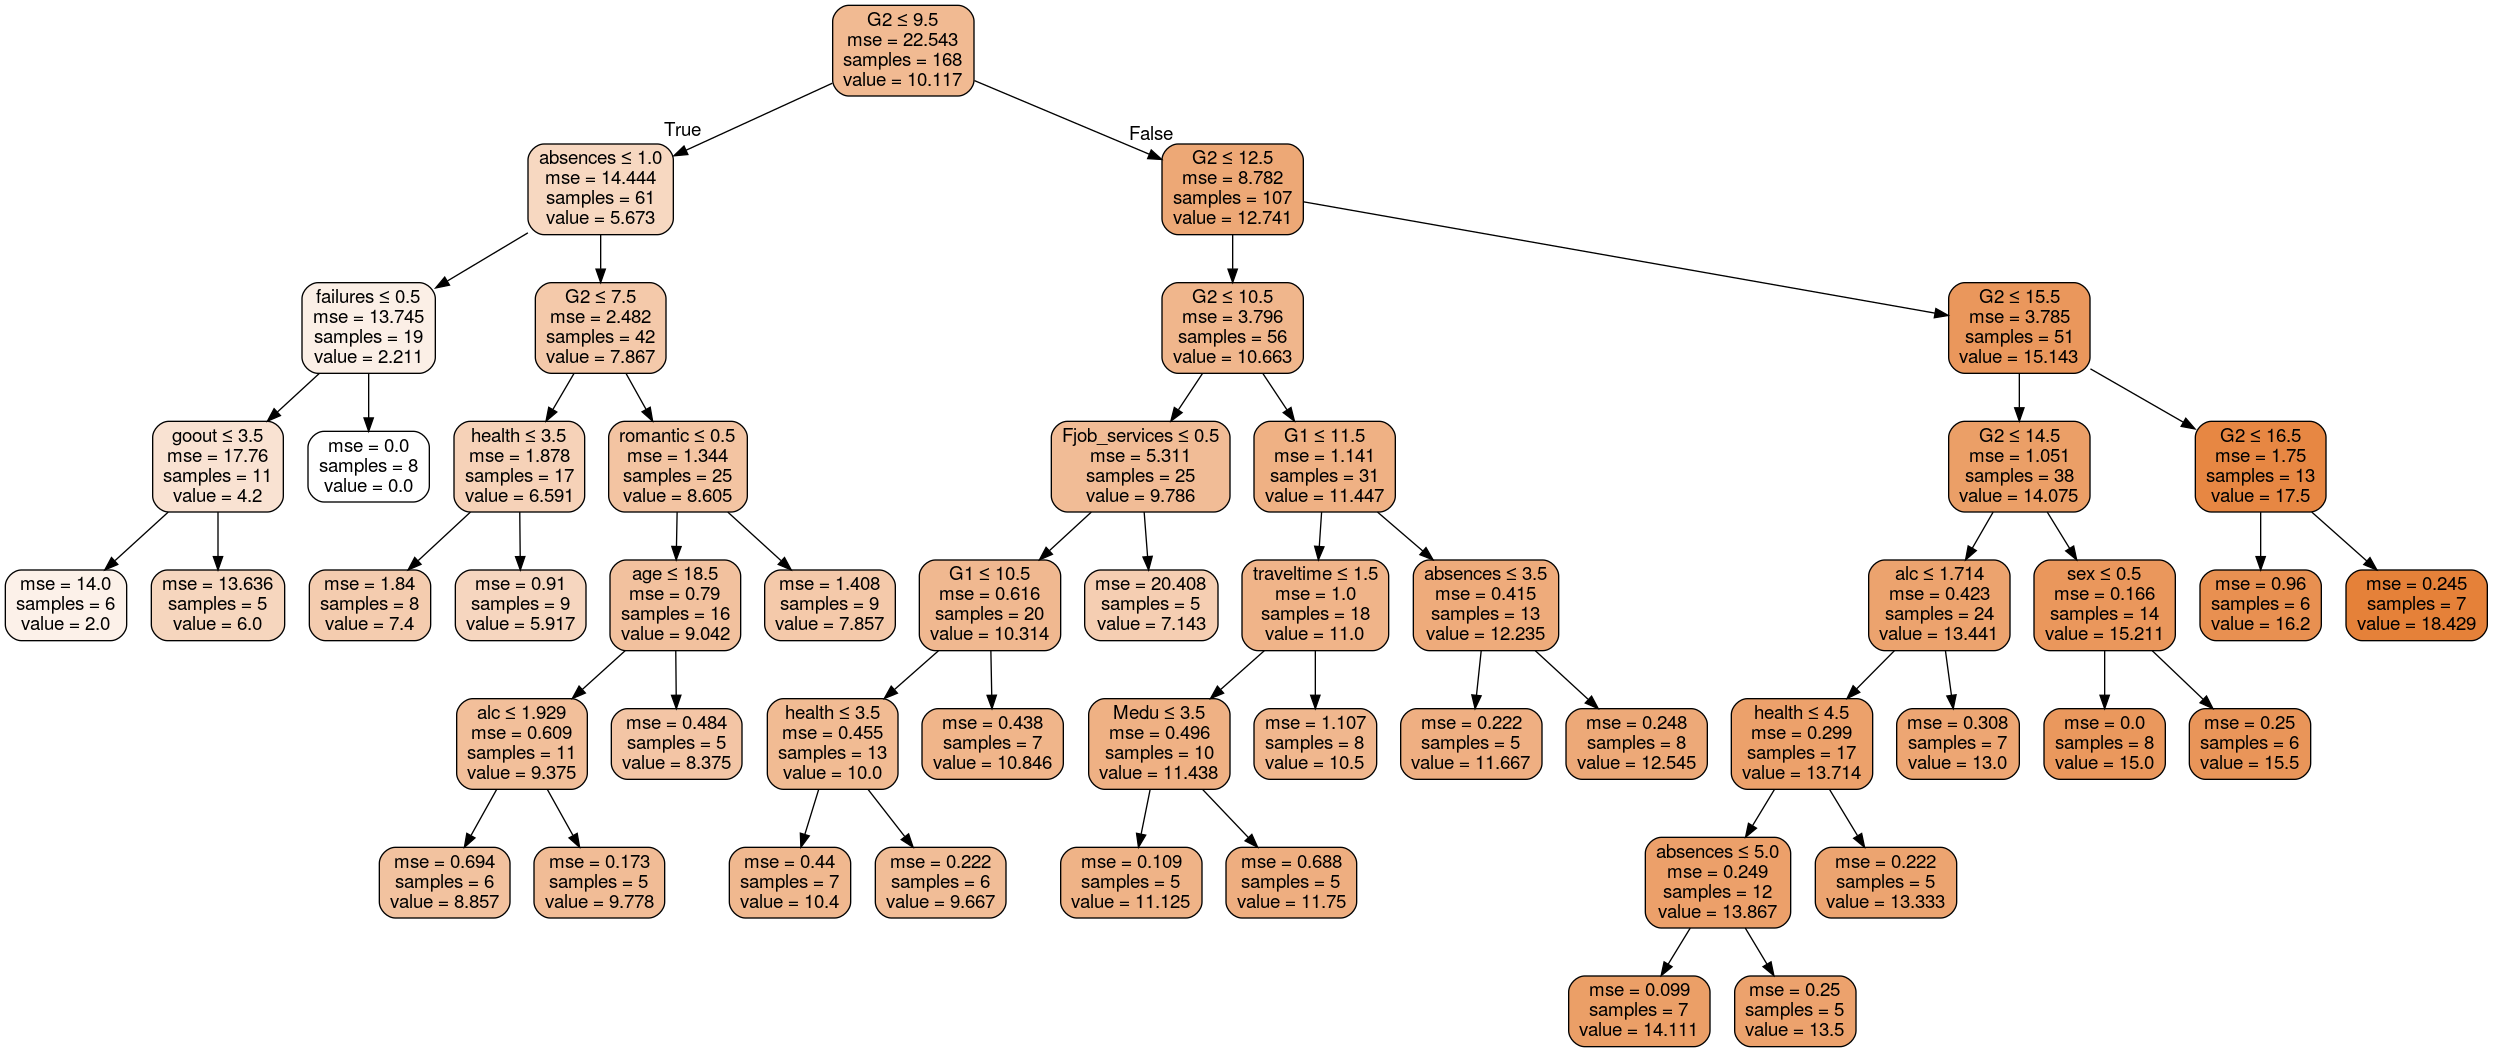

In [174]:
show_tree(rforest_m.estimators_[5],X_math,y_math)

For example RandomForest for portugal: 

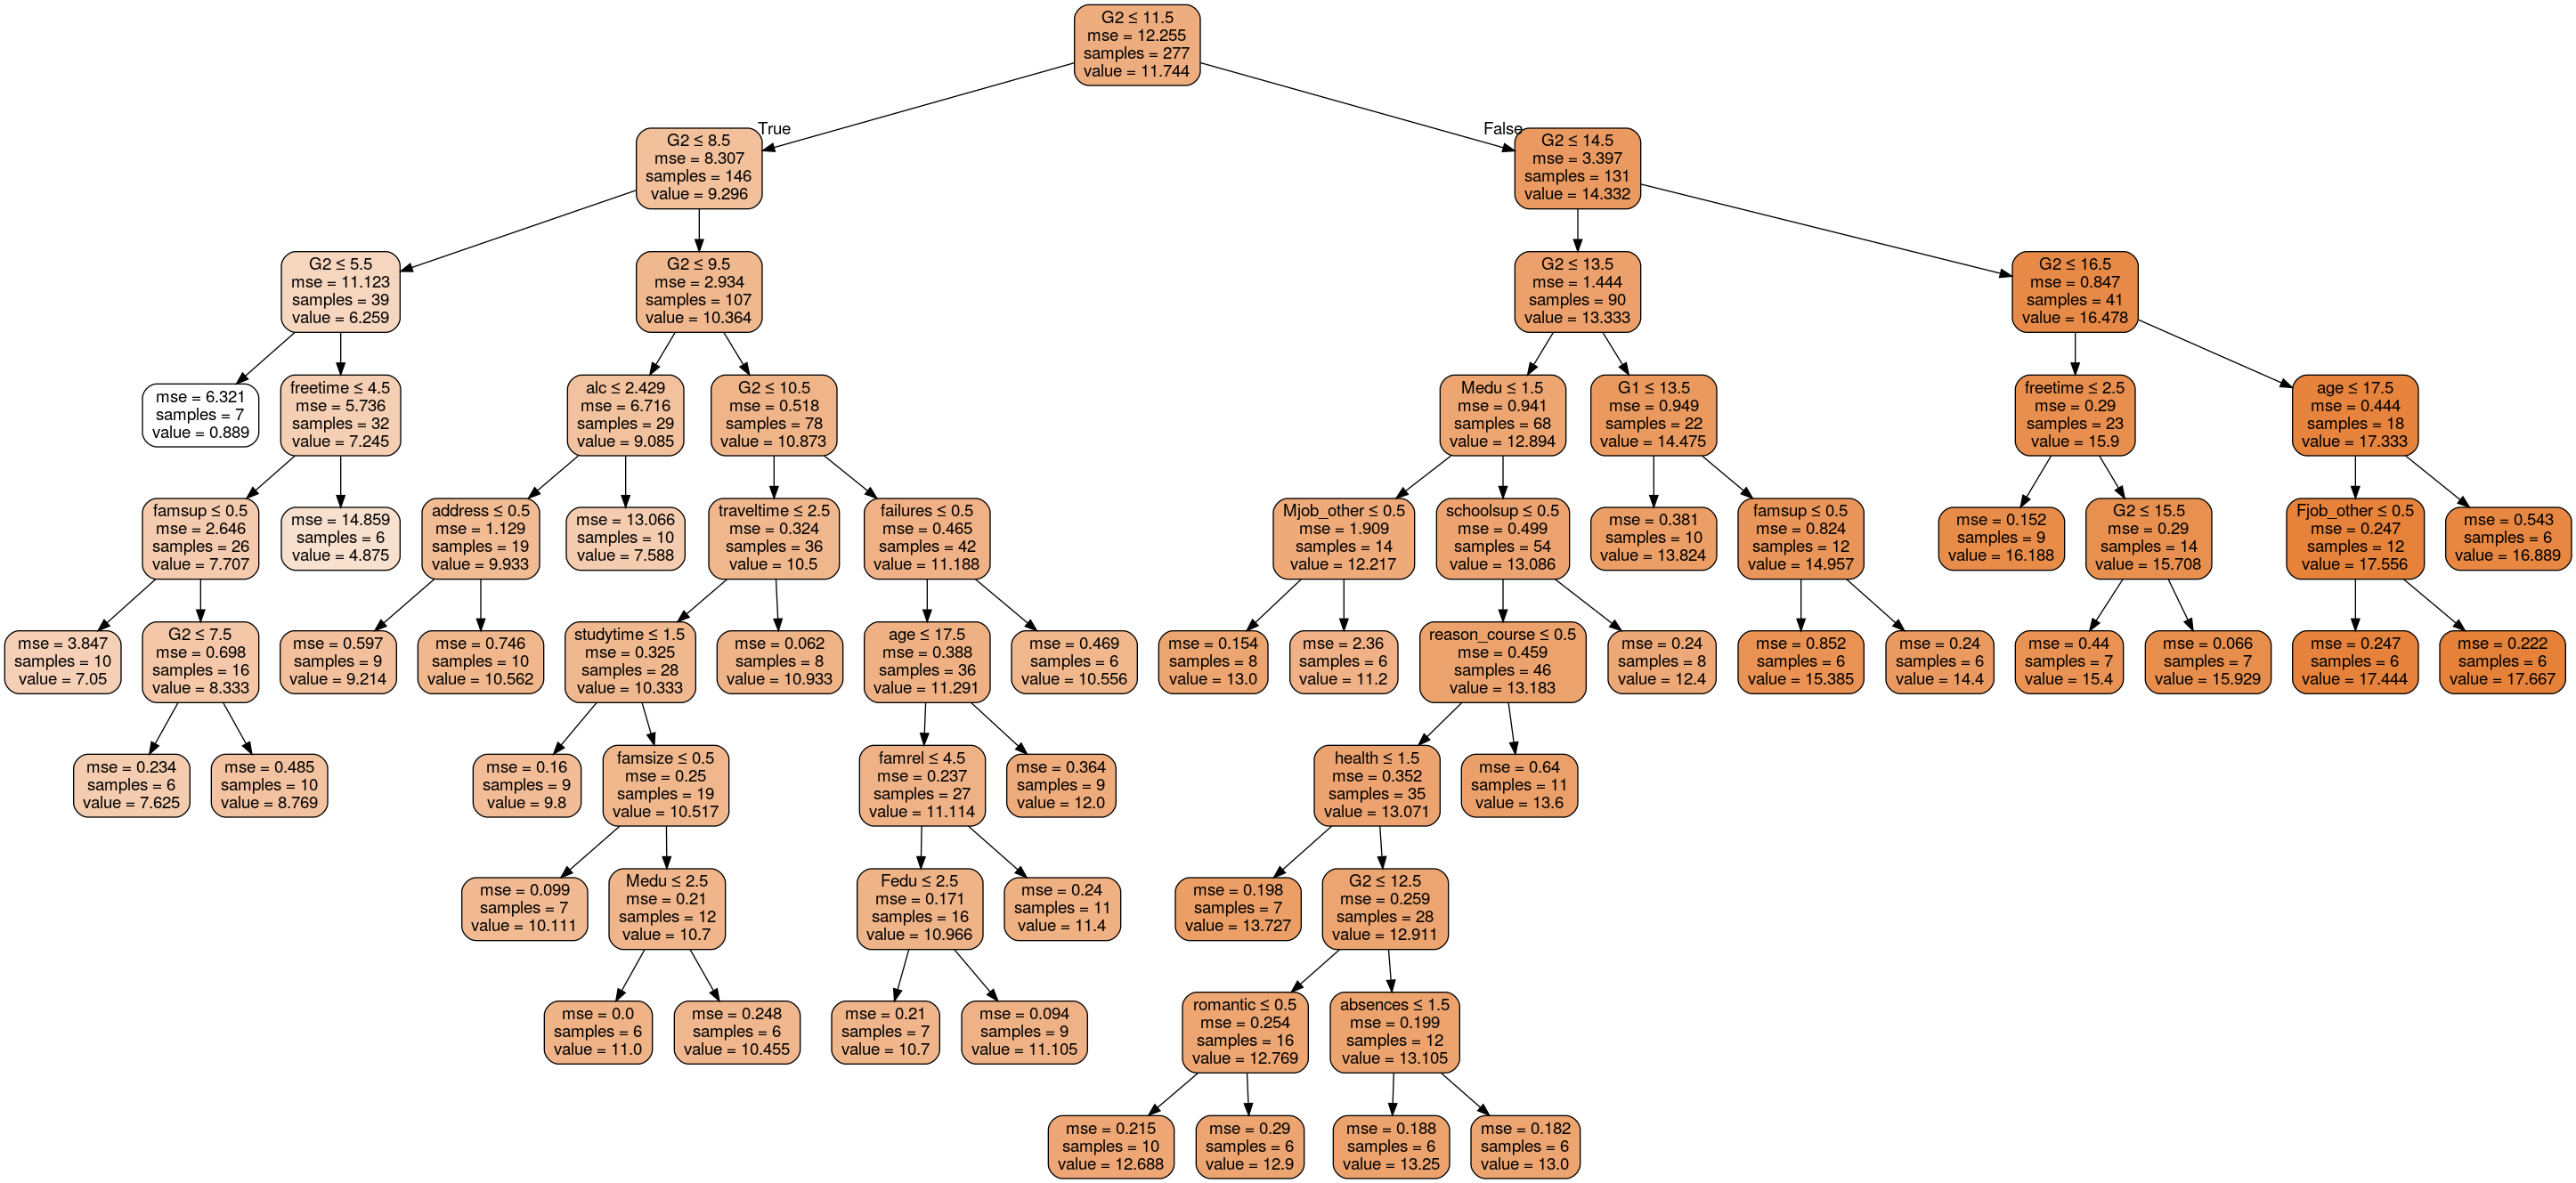

In [175]:
show_tree(rforest_p.estimators_[5],X_port,y_port)

and conclude that they have good prediction on test dataset

Also if we look at dataset without grades, the main features is

- failures
- absences
- Mjob_others

but in dataset with grades absences & Mjob_others are not so influential